# **Loreto- Maynas: Gastos en Alimientos y Bebidas**
### I analyzed the economic data in the ENAHO (Encuesta Nacional de Hogares) survey conducted by INEI (Instituto Nacional de Estadística e Informática) in 2023 in 3 trimesters.
### Variable definitions, methodologies, and original survey forms can be accessed in the repository as "Diccionarios", "Ficha-Tecnica", and "CED-01-100-2023" correspondingly.
### Data can be accessed at: https://proyectos.inei.gob.pe/microdatos/Consulta_por_Encuesta.asp

## **Methodology and Data Considerations**
This analysis provides a detailed comparison of living expenses across various regions, focusing on the disparities in food prices. The methodology and data collection processes were meticulously designed to ensure accuracy and representativeness. However, it's important to note a few considerations:

### **Exclusion of Certain Categories:** 
The categories of 'Fruit' and 'Sweets' were not included in this analysis. The decision to omit these categories was due to the data not being sufficiently cleaned and the need for timely submission of this report. It's worth mentioning that fruits, in particular, are often part of the informal economy, leading to a lack of data that can be reliably corroborated.

### **Category Definitions:**
While utmost care was taken in categorizing the items, there might be occasional inconsistencies in the categorization of food items due to the urgency to complete the analysis. Nonetheless, I assure you that the data integrity is intact, and the analysis provides a robust representation of the cost disparities.

### **Data Transparency and Verification:**
The data used in this analysis is publicly available. This transparency ensures that the findings are verifiable, and stakeholders can conduct their own analysis if desired. I am open to discussing the methodology in more detail and can provide further corroboration upon request.

It's my commitment to provide accurate and meaningful insights to support decision-making. While certain limitations are present, the core findings of the analysis stand firm, highlighting significant regional disparities in living expenses.

# **Notebook Summary and Explanation**

## **State Discrepancies**
The first graph and correlating statistics overall represents the disparity in pricing between the Zipcodes of San Juan, Iquitos, and Belen and the other States in Peru for which there is data. With increased time, I can anaylze further different states and clean the data to itemize all UBIGEO codes and recategorize all the food items.

## **Subsequent Graphs**
All subsequent graphs compare the prices of thousands of food items (divided by categories) in the Zip Codes for Iquitos mentioned above to the average price of those items across all of Peru.


In [ ]:
### MAKE CITY VS RURAL ALL ANALYSIS!!!!--- OTHER NULL, NONE, NA--- MANUALLY SORT ZIPCODES IN CSV-- CATEGORIES RURAL URBAN FILTER FOR OTHER SITES LAT LONGS AND SAMPLE SIZE AND GEOS TO REPO WITH DATA TOO
#CHANGE DIRECTORIES #FIX STATES
### ONLY ZIPS WHERE OTHER VOLUNTEERS ARE FOR THE OTHER DF
#SOLVE DATA THAT DOESNT MAKE SENSE CHECK SAMPLE SIZE EXPLAIN CLEANING BETTER- EXPLAIN CLEANING BY GEO REPPING SAMPLES FOR EACH CATEGORY
#ONLY KEEP REASONABLE SAMPLE SIZES----- BALANCE THE SAMPLE SIZES FOR STATE CLASS BALANCE
CONSIDER AGGREGATING FOOD TYPES AND CATEGORIES for one representative sampleand a heat map and plot for all sites

REWRITE MY NOTES and the REPORT AND NOTE MY CODE

In [11]:
#import and upload data
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

csv_file_path = 'your_file_name.csv' 

tri1 = '/home/emily_calvert/Documents/bebidas_alimientos/trimester1.csv'
tri2 = '/home/emily_calvert/Documents/bebidas_alimientos/trimester2.csv'
tri3 = '/home/emily_calvert/Documents/bebidas_alimientos/trimester3.csv'

In [12]:
#read data
tri1df = pd.read_csv(tri1, encoding='ISO-8859-1')
tri2df = pd.read_csv(tri2, encoding='ISO-8859-1')
tri3df = pd.read_csv(tri3, encoding='ISO-8859-1')

In [13]:
#set column keys
pd.set_option('display.max_columns', None)

print(tri1df.columns.tolist())

['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO', 'ESTRATO', 'P601A', 'P601X', 'P601B', 'P601A1', 'P601A2', 'P601A3', 'P601A4', 'P601A5', 'P601A6', 'P601A7', 'P601B1', 'P601B2', 'P601B3', 'P601B4', 'P601C', 'P601D1', 'P601D2', 'P601D3', 'I601B2', 'D601C', 'I601C', 'I601D2', 'PRODUC61', 'TICUEST01', 'BLIBRE23', 'I601E', 'T601A71', 'T601A72', 'FACTOR']


In [14]:
#identify columns to drop
extra_columns1a = []
extra_columns1b = []
extra_columns2a = []
extra_columns2b = []
extra_columns3a = []
extra_columns3b = []

for column in tri1df.columns:
    if column not in tri2df.columns:
        extra_columns1a.append(column)

for column in tri1df.columns:
    if column not in tri3df.columns:
        extra_columns1b.append(column)


for column in tri2df.columns:
    if column not in tri1df.columns:
        extra_columns2a.append(column)

for column in tri2df.columns:
    if column not in tri3df.columns:
        extra_columns2b.append(column)

for column in tri3df.columns:
    if column not in tri1df.columns:
        extra_columns3a.append(column)

for column in tri3df.columns:
    if column not in tri2df.columns:
        extra_columns3b.append(column)

# Print the extra column(s)
print("column(s) in tri1df not in tri2df:", extra_columns1a)
print("column(s) in tri1df not in tri2df:", extra_columns1b)
print("column(s) in tri2df not in tri1df:", extra_columns2a)
print("column(s) in tri2df not in tri3df:", extra_columns2b)
print("column(s) in tri3df not in tri1df:", extra_columns3a)
print("column(s) in tri3df not in tri2df:", extra_columns3b)

column(s) in tri1df not in tri2df: ['T601A71', 'T601A72']
column(s) in tri1df not in tri2df: []
column(s) in tri2df not in tri1df: []
column(s) in tri2df not in tri3df: []
column(s) in tri3df not in tri1df: []
column(s) in tri3df not in tri2df: ['T601A71', 'T601A72']


In [15]:
#check column prder
same_order = (list(tri1df.columns) == list(tri2df.columns)) and (list(tri2df.columns) == list(tri3df.columns))

if not same_order:
    print("Columns in tri1df:", tri1df.columns)
    print("Columns in tri2df:", tri2df.columns)
    print("Columns in tri3df:", tri3df.columns)
else:
    print("All DataFrames have the same columns in the same order.")

Columns in tri1df: Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'P601A', 'P601X', 'P601B', 'P601A1', 'P601A2', 'P601A3',
       'P601A4', 'P601A5', 'P601A6', 'P601A7', 'P601B1', 'P601B2', 'P601B3',
       'P601B4', 'P601C', 'P601D1', 'P601D2', 'P601D3', 'I601B2', 'D601C',
       'I601C', 'I601D2', 'PRODUC61', 'TICUEST01', 'BLIBRE23', 'I601E',
       'T601A71', 'T601A72', 'FACTOR'],
      dtype='object')
Columns in tri2df: Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'P601A', 'P601X', 'P601B', 'P601A1', 'P601A2', 'P601A3',
       'P601A4', 'P601A5', 'P601A6', 'P601A7', 'P601B1', 'P601B2', 'P601B3',
       'P601B4', 'P601C', 'P601D1', 'P601D2', 'P601D3', 'I601B2', 'D601C',
       'I601C', 'I601D2', 'I601E', 'PRODUC61', 'TICUEST01', 'BLIBRE23',
       'FACTOR'],
      dtype='object')
Columns in tri3df: Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 

In [16]:
# T601A71 = Obtuvo el producto: Otro Sin bienes libres10N
# T601A72 = Obtuvo el producto: Otro Bienes libres10N
#I eliminated these. 

In [17]:
#combine all dataframes
tri1df = tri1df.drop(columns=['T601A71'])
tri1df = tri1df.drop(columns=['T601A72'])
tri3df = tri3df.drop(columns=['T601A71'])
tri3df = tri3df.drop(columns=['T601A72'])
combined_df = pd.concat([tri1df, tri2df, tri3df], ignore_index=True)

In [18]:
#Keep and rename location, product name, purchase amount, and purchase quantity columns

In [19]:
combined_df = combined_df[['P601X', 'UBIGEO', 'P601B4', 'P601B2']]

combined_df = combined_df.rename(columns={
    'P601X': 'Product Name',
    'UBIGEO': 'Geographical location',
    'P601B4': 'What was the total amount of the purchase?',
    'P601B2': 'What was the purchase quantity? - Quantity and Unit of Measure'
})

In [21]:
#resolve none types and data types in geographic location
all_zips = [160113, 160112, 160101]
na_values = ['NA', 'none', 'other', '', ' ', None]
combined_df['Geographical location'] = pd.to_numeric(combined_df['Geographical location'], errors='coerce')
combined_df = combined_df.dropna(subset=['Geographical location'])
combined_df = combined_df[combined_df['Geographical location'] != 0]
mask = combined_df['Geographical location'].isin(all_zips)
combined_df.loc[~mask, 'Geographical location'] = combined_df.loc[~mask, 'Geographical location'].astype(int)
combined_df.loc[mask, 'Geographical location'] = combined_df.loc[mask, 'Geographical location'].astype(str)

In [23]:
#resolve none types and data types in Product Name
na_values = ['none', 'null', 'na', 'n/a', 'ninguno', 'nada']
na_values = [x.lower() for x in na_values if x is not None]
combined_df['Product Name'] = combined_df['Product Name'].astype(str)
combined_df = combined_df[~combined_df['Product Name'].str.lower().isin(na_values)]
combined_df = combined_df[combined_df['Product Name'].notna()]

In [24]:
#convert price to a float and drop nones
combined_df['What was the total amount of the purchase?'] = pd.to_numeric(combined_df['What was the total amount of the purchase?'], errors='coerce')
combined_df = combined_df.dropna(subset=['What was the total amount of the purchase?'])
combined_df['What was the purchase quantity? - Quantity and Unit of Measure'] = pd.to_numeric(combined_df['What was the purchase quantity? - Quantity and Unit of Measure'], errors='coerce')

In [25]:
#convert quantity to an int and impute nones based on product name averages
average_quantities = combined_df.groupby('Product Name')['What was the purchase quantity? - Quantity and Unit of Measure'].transform('mean')
combined_df['What was the purchase quantity? - Quantity and Unit of Measure'].fillna(average_quantities, inplace=True)
combined_df['What was the purchase quantity? - Quantity and Unit of Measure'] = combined_df['What was the purchase quantity? - Quantity and Unit of Measure'].astype(int)

In [26]:
#identify which UBIGEO codes correspond to each state
amazonas_codes = list(range(10101, 10200)) 
ancash_codes = list(range(10201, 10300))
apurimac_codes = list(range(10301, 10400))
arequipa_codes = list(range(10401, 10500))
ayacucho_codes = list(range(10501, 10600)) 
cajamarca_codes = list(range(10601, 10700))
cusco_codes = list(range(10701, 10800)) 
huanuco_codes = list(range(10801, 10900))
ica_codes = list(range(10901, 11000))
junin_codes = list(range(11001, 11100)) 
la_libertad_codes = list(range(11101, 11200)) 
lambayeque_codes = list(range(11201, 11300)) 
lima_codes = list(range(11301, 11400))
loreto_codes = list(range(11401, 11500)) 
madre_de_dios_codes = list(range(11501, 11600)) 
moquegua_codes = list(range(11601, 11700))
pasco_codes = list(range(11701, 11800))
piura_codes = list(range(11801, 11900))
puno_codes = list(range(11901, 12000))
san_martin_codes = list(range(12001, 12100)) 
tacna_codes = list(range(12101, 12200)) 
tumbes_codes = list(range(12201, 12300))  
ucayali_codes = list(range(12301, 12400))  

In [27]:
# Combining all department codes into a dictionary
all_departments_codes = ({
    'AMAZONAS': amazonas_codes,
    'ANCASH': ancash_codes,
    'APURÍMAC': apurimac_codes,
    'AREQUIPA': arequipa_codes,
    'AYACUCHO': ayacucho_codes,
    'CAJAMARCA': cajamarca_codes,
    'CUSCO': cusco_codes,
    'HUÁNUCO': huanuco_codes,
    'ICA': ica_codes,
    'JUNÍN': junin_codes,
    'LA LIBERTAD': la_libertad_codes,
    'LAMBAYEQUE': lambayeque_codes,
    'LIMA': lima_codes,
    'LORETO': loreto_codes,
    'MADRE DE DIOS': madre_de_dios_codes,
    'MOQUEGUA': moquegua_codes,
    'PASCO': pasco_codes,
    'PIURA': piura_codes,
    'PUNO': puno_codes,
    'SAN MARTÍN': san_martin_codes,
    'TACNA': tacna_codes,
    'TUMBES': tumbes_codes,
    'UCAYALI': ucayali_codes
})

In [28]:
#append state names excluding zips of interest
excluded_codes = ['160101', '160112', '160113']
for dept, codes in all_departments_codes.items():
    all_departments_codes[dept] = [code for code in codes if code not in excluded_codes]

In [29]:
# Create a mapping from UBIGEO codes to department names
ubigeo_to_department = {code: dept for dept, codes in all_departments_codes.items() for code in codes}

def ubigeo_to_dept(code):
    return ubigeo_to_department.get(code, 'Unknown') 

combined_df['Department'] = combined_df['Geographical location'].apply(ubigeo_to_dept)

In [86]:
#uploads our food catergories
df1 = pd.read_csv('/home/emily_calvert/Documents/food_categories.csv')

In [117]:
#make new dfs categorized

keys_list = df1.values.flatten()
combined_df['IsKey'] = combined_df['Product Name'].isin(keys_list)

product_counts = combined_df['Product Name'].value_counts()
to_drop = product_counts[product_counts <= 2].index.tolist()
combined_df = combined_df[~((combined_df['Product Name'].isin(to_drop)) & (~combined_df['IsKey']))]

combined_df.loc[~combined_df['IsKey'], 'Category'] = 'Other'

# Step 4: Create category DataFrames
category_dfs = {}
for category in df1.columns:
    category_keys = df1[category].dropna().tolist()
    # Create a DataFrame for each category
    category_dfs[category] = combined_df[combined_df['Product Name'].isin(category_keys)]
    
    # It's also a good idea to check if 'Other' needs to be a separate DataFrame
category_dfs['Other'] = combined_df[combined_df['Category'] == 'Other']

AttributeError: 'dict' object has no attribute 'columns'

In [92]:
# combine all information for target zips into one df
filtered_df=combined_df
filtered_df['Geographical location'] = combined_df['Geographical location'].astype(int)
filtered_df = filtered_df[filtered_df['Geographical location'].isin(all_zips)]

In [93]:
#append lat and long to samples in target zips
ubigeo_coordinates = {
    "160101": (-3.74805555555556, -73.2441666666667),
    "160112": (-3.76916666666667, 	-73.26),
    "160113": (-3.77027777777778, -73.2802777777778),
    }

filtered_df["Geographical location"] = filtered_df["Geographical location"].astype(str)

def get_lat_lon(ubigeo):
    return ubigeo_coordinates.get(ubigeo, (None, None))
    
filtered_df['Latitude'] = filtered_df["Geographical location"].apply(lambda x: get_lat_lon(x)[0])
filtered_df['Longitude'] = filtered_df["Geographical location"].apply(lambda x: get_lat_lon(x)[1])

filtered_df.head()

,Product Name,Geographical location,What was the total amount of the purchase?,What was the purchase quantity? - Quantity and Unit of Measure,Department,IsKey,Category,Latitude,Longitude
474451,Pan Corriente o común,160101,2.0,192,Unknown,True,nan,-3.748056,-73.244167
474458,PAN BAGUETTE,160101,7.0,504,Unknown,True,nan,-3.748056,-73.244167
474465,ROSQUITAS AZUCARADAS,160101,7.0,2,Unknown,True,nan,-3.748056,-73.244167
474468,Arroz Envasado Superior,160101,3.0,10,Unknown,True,nan,-3.748056,-73.244167
474472,Leche Evaporada,160101,3.0,400,Unknown,True,nan,-3.748056,-73.244167


In [95]:
#map target samples
import folium

new_map = folium.Map(location=[-3.75, -73.25], zoom_start=10)

# Calculate the count for each UBIGEO code
ubigeo_counts = filtered_df['Geographical location'].value_counts()

# Iterate through the DataFrame and add markers
for index, row in filtered_df.drop_duplicates('Geographical location').iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    ubigeo_code = row['Geographical location']
    count = ubigeo_counts[ubigeo_code]
    if lat is not None and lon is not None:
        # Create a popup text with the count for the UBIGEO code
        popup_text = f"Count: {count}"
        # Add marker with popup to the new map
        folium.Marker([lat, lon], popup=popup_text).add_to(new_map)

# Display the new map
new_map

In [101]:
import matplotlib.pyplot as plt

average_prices_zipcodes = filtered_df.groupby(['Product Name', 'Geographical location'])['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = combined_df.groupby(['Product Name', 'Department'])['What was the total amount of the purchase?'].mean().reset_index()
merged_df = pd.merge(average_prices_zipcodes, average_prices_states, on='Product Name', how='outer', suffixes=('_Zipcode', '_State'))
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Department')['Percentage Difference'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 8))
plt.bar(overall_percentage_difference['Department'], overall_percentage_difference['Percentage Difference'], color='turquoise')
plt.xlabel('Department')
plt.ylabel('Overall Percentage Difference (%)')
plt.title('Overall Percentage Difference Between States and Food Prices in Iquitos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the overall percentage difference for each bread product
for index, row in overall_percentage_difference.iterrows():
    department = row['Department']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {department}: {percentage_difference:.2f}%")


KeyError: 'What was the total amount of the purchase?_Zipcodes'

# **Bread**

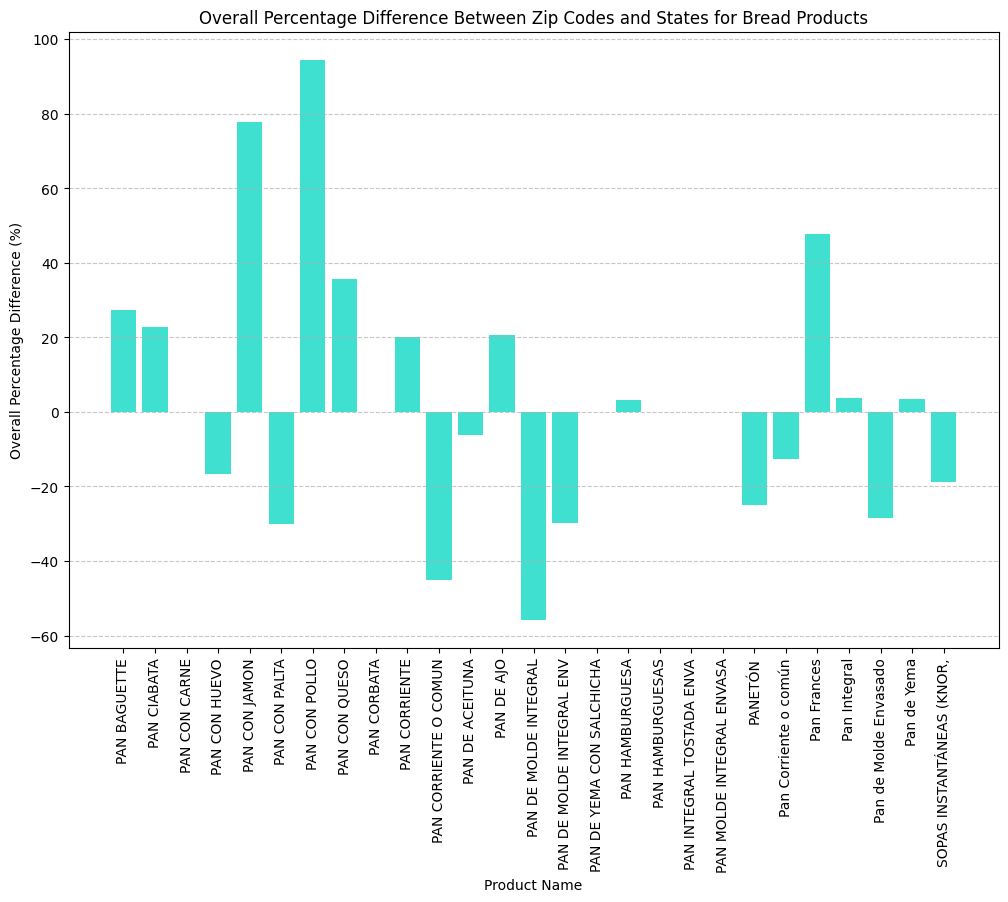

Overall percentage difference for PAN BAGUETTE: 27.27%
Overall percentage difference for PAN CIABATA: 22.81%
Overall percentage difference for PAN CON CARNE: 0.00%
Overall percentage difference for PAN CON HUEVO: -16.67%
Overall percentage difference for PAN CON JAMON: 77.78%
Overall percentage difference for PAN CON PALTA: -30.00%
Overall percentage difference for PAN CON POLLO: 94.53%
Overall percentage difference for PAN CON QUESO: 35.68%
Overall percentage difference for PAN CORBATA: 0.00%
Overall percentage difference for PAN CORRIENTE: 20.00%
Overall percentage difference for PAN CORRIENTE O COMUN: -45.00%
Overall percentage difference for PAN DE ACEITUNA: -6.25%
Overall percentage difference for PAN DE AJO: 20.69%
Overall percentage difference for PAN DE MOLDE INTEGRAL: -55.71%
Overall percentage difference for PAN DE MOLDE INTEGRAL ENV: -29.87%
Overall percentage difference for PAN DE YEMA CON SALCHICHA: 0.00%
Overall percentage difference for PAN HAMBURGUESA: 3.23%
Overall per

In [100]:
breads = category_dfs['breads']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = breads.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(overall_percentage_difference['Product Name'], overall_percentage_difference['Percentage Difference'], color='turquoise')
plt.xlabel('Product Name')
plt.ylabel('Overall Percentage Difference (%)')
plt.title('Overall Percentage Difference Between Zip Codes and States for Bread Products')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Pastries**

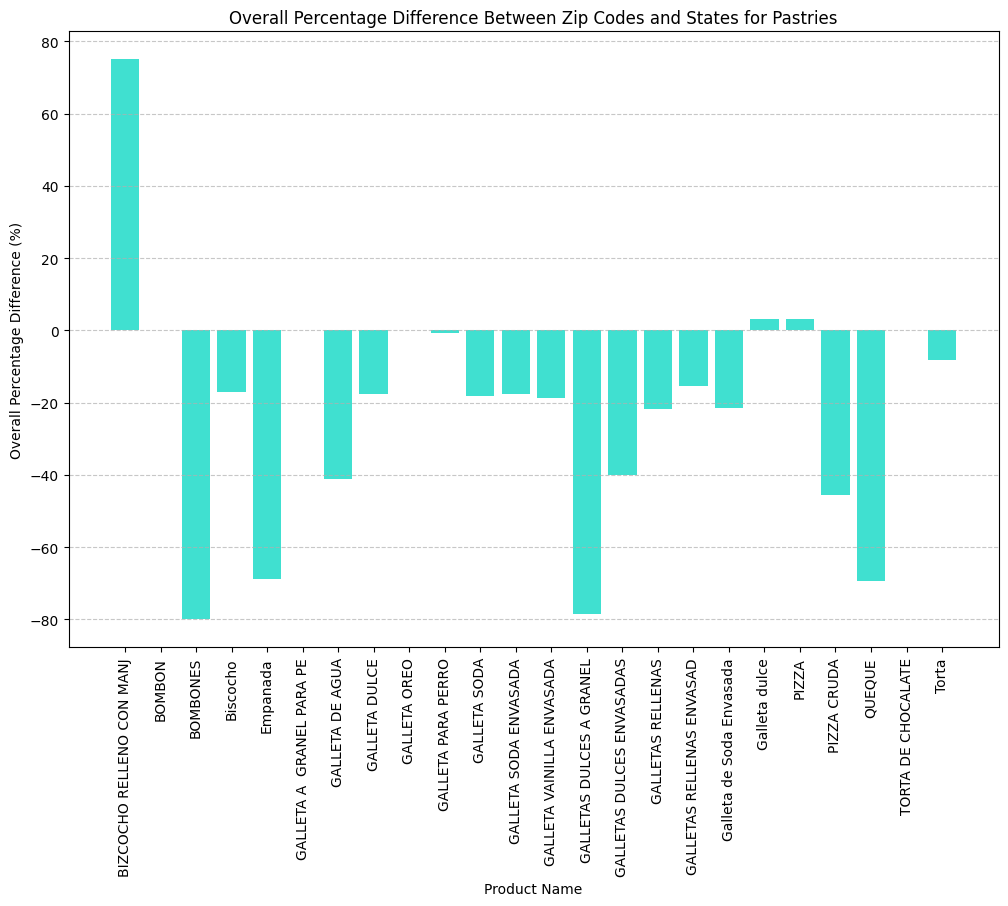

Overall percentage difference for BIZCOCHO RELLENO CON MANJ: 75.00%
Overall percentage difference for BOMBON: 0.00%
Overall percentage difference for BOMBONES: -80.00%
Overall percentage difference for Biscocho: -17.17%
Overall percentage difference for Empanada: -68.74%
Overall percentage difference for GALLETA A  GRANEL PARA PE: 0.00%
Overall percentage difference for GALLETA DE AGUA: -41.11%
Overall percentage difference for GALLETA DULCE: -17.65%
Overall percentage difference for GALLETA OREO: 0.00%
Overall percentage difference for GALLETA PARA PERRO: -0.82%
Overall percentage difference for GALLETA SODA: -18.18%
Overall percentage difference for GALLETA SODA ENVASADA: -17.71%
Overall percentage difference for GALLETA VAINILLA ENVASADA: -18.75%
Overall percentage difference for GALLETAS DULCES A GRANEL: -78.38%
Overall percentage difference for GALLETAS DULCES ENVASADAS: -40.12%
Overall percentage difference for GALLETAS RELLENAS: -21.87%
Overall percentage difference for GALLETAS

In [102]:
pastries = category_dfs['pastries']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = pastries.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(overall_percentage_difference['Product Name'], overall_percentage_difference['Percentage Difference'], color='turquoise')
plt.xlabel('Product Name')
plt.ylabel('Overall Percentage Difference (%)')
plt.title('Overall Percentage Difference Between Zip Codes and States for Pastries')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Rice Products**

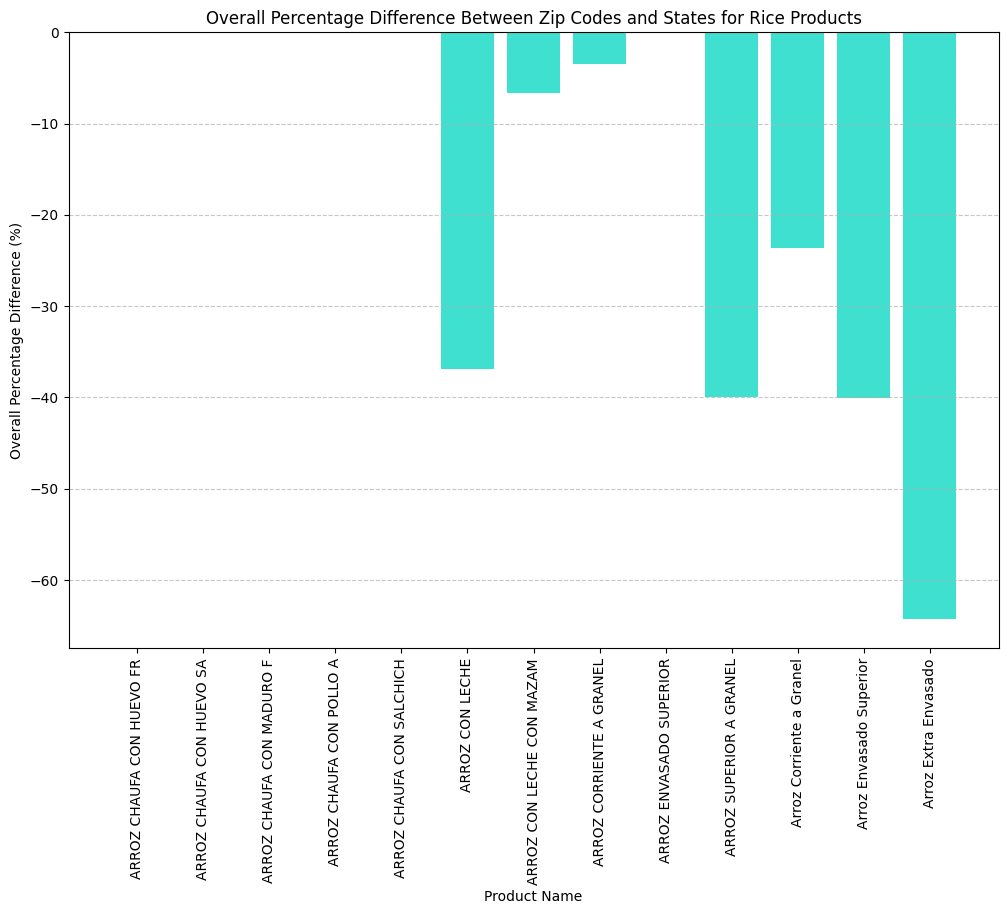

Overall percentage difference for ARROZ CHAUFA CON HUEVO FR: 0.00%
Overall percentage difference for ARROZ CHAUFA CON HUEVO SA: 0.00%
Overall percentage difference for ARROZ CHAUFA CON MADURO F: 0.00%
Overall percentage difference for ARROZ CHAUFA CON POLLO A: 0.00%
Overall percentage difference for ARROZ CHAUFA CON SALCHICH: 0.00%
Overall percentage difference for ARROZ CON LECHE: -36.88%
Overall percentage difference for ARROZ CON LECHE CON MAZAM: -6.67%
Overall percentage difference for ARROZ CORRIENTE A GRANEL: -3.45%
Overall percentage difference for ARROZ ENVASADO SUPERIOR: 0.00%
Overall percentage difference for ARROZ SUPERIOR A GRANEL: -39.99%
Overall percentage difference for Arroz Corriente a Granel: -23.63%
Overall percentage difference for Arroz Envasado Superior: -40.06%
Overall percentage difference for Arroz Extra Envasado: -64.26%


In [103]:
rice_products = category_dfs['rice_products']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = rice_products.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(overall_percentage_difference['Product Name'], overall_percentage_difference['Percentage Difference'], color='turquoise')
plt.xlabel('Product Name')
plt.ylabel('Overall Percentage Difference (%)')
plt.title('Overall Percentage Difference Between Zip Codes and States for Rice Products')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Dairy Products**

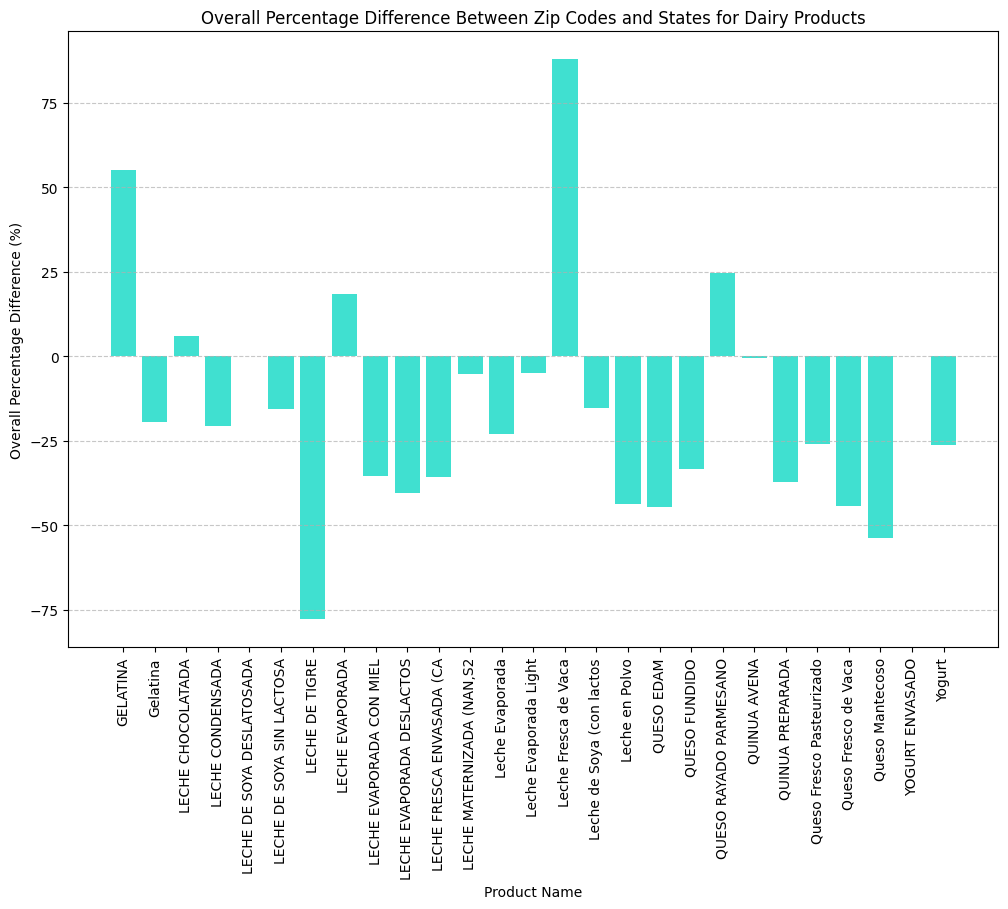

Overall percentage difference for GELATINA: 55.20%
Overall percentage difference for Gelatina: -19.54%
Overall percentage difference for LECHE CHOCOLATADA: 5.99%
Overall percentage difference for LECHE CONDENSADA: -20.64%
Overall percentage difference for LECHE DE SOYA DESLATOSADA: 0.00%
Overall percentage difference for LECHE DE SOYA SIN LACTOSA: -15.45%
Overall percentage difference for LECHE DE TIGRE: -77.78%
Overall percentage difference for LECHE EVAPORADA: 18.52%
Overall percentage difference for LECHE EVAPORADA CON MIEL: -35.25%
Overall percentage difference for LECHE EVAPORADA DESLACTOS: -40.27%
Overall percentage difference for LECHE FRESCA ENVASADA (CA: -35.77%
Overall percentage difference for LECHE MATERNIZADA (NAN,S2: -5.21%
Overall percentage difference for Leche Evaporada: -22.94%
Overall percentage difference for Leche Evaporada Light: -5.03%
Overall percentage difference for Leche Fresca de Vaca: 87.86%
Overall percentage difference for Leche de Soya (con lactos: -15.3

In [104]:
dairy_products = category_dfs['dairy_products']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = dairy_products.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(overall_percentage_difference['Product Name'], overall_percentage_difference['Percentage Difference'], color='turquoise')
plt.xlabel('Product Name')
plt.ylabel('Overall Percentage Difference (%)')
plt.title('Overall Percentage Difference Between Zip Codes and States for Dairy Products')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Eggs**

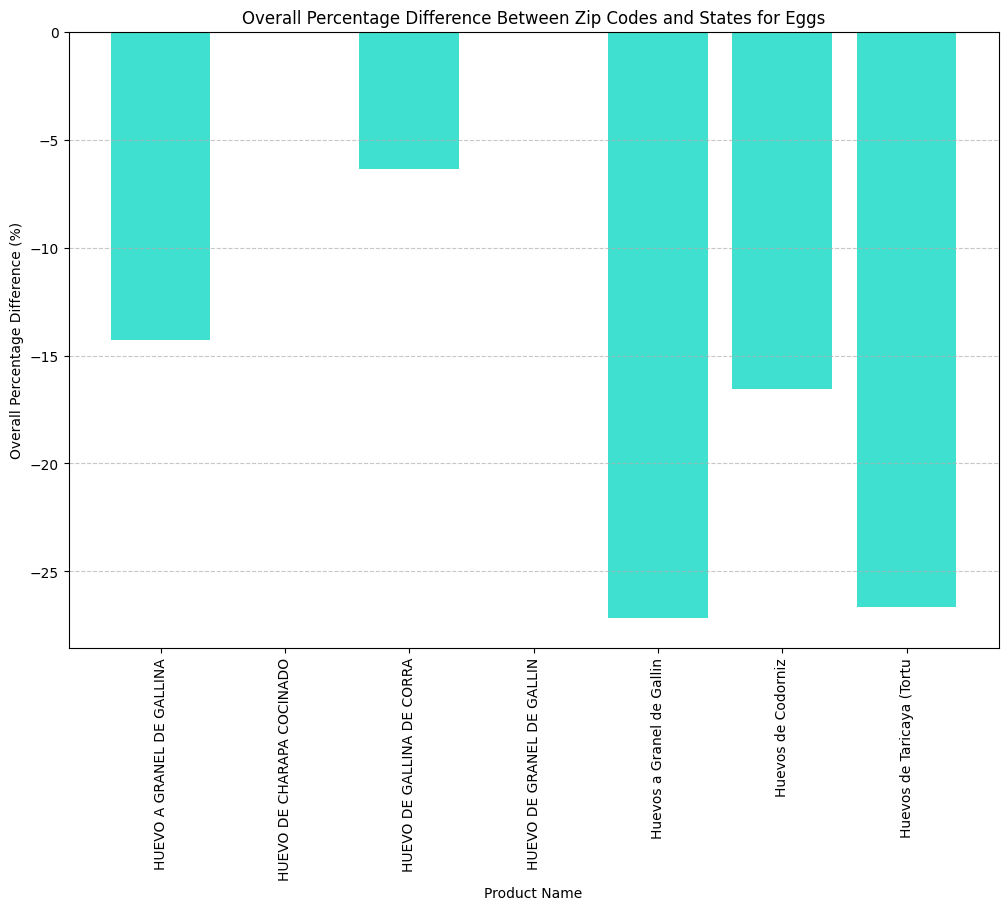

Overall percentage difference for HUEVO A GRANEL DE GALLINA: -14.29%
Overall percentage difference for HUEVO DE CHARAPA COCINADO: 0.00%
Overall percentage difference for HUEVO DE GALLINA DE CORRA: -6.34%
Overall percentage difference for HUEVO DE GRANEL DE GALLIN: 0.00%
Overall percentage difference for Huevos a Granel de Gallin: -27.17%
Overall percentage difference for Huevos de Codorniz: -16.56%
Overall percentage difference for Huevos de Taricaya (Tortu: -26.67%


In [105]:
eggs = category_dfs['eggs']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = eggs.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(overall_percentage_difference['Product Name'], overall_percentage_difference['Percentage Difference'], color='turquoise')
plt.xlabel('Product Name')
plt.ylabel('Overall Percentage Difference (%)')
plt.title('Overall Percentage Difference Between Zip Codes and States for Eggs')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Meat Products**

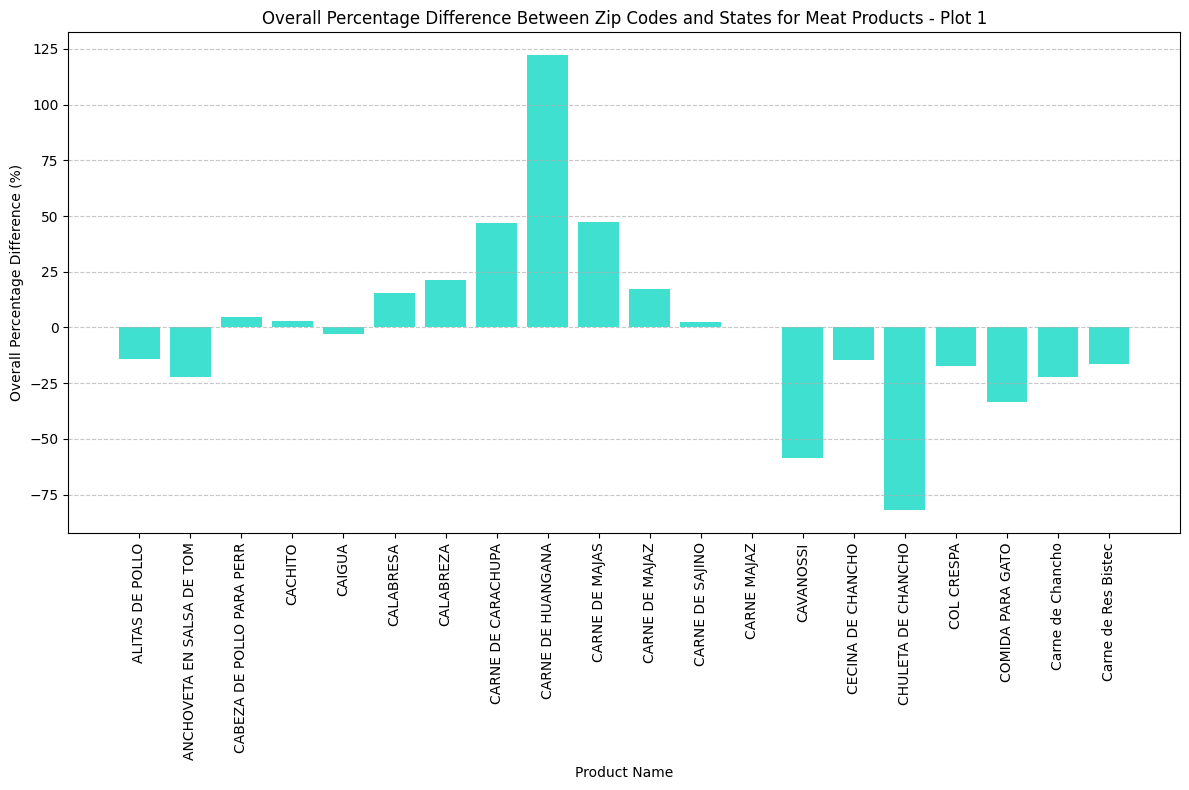

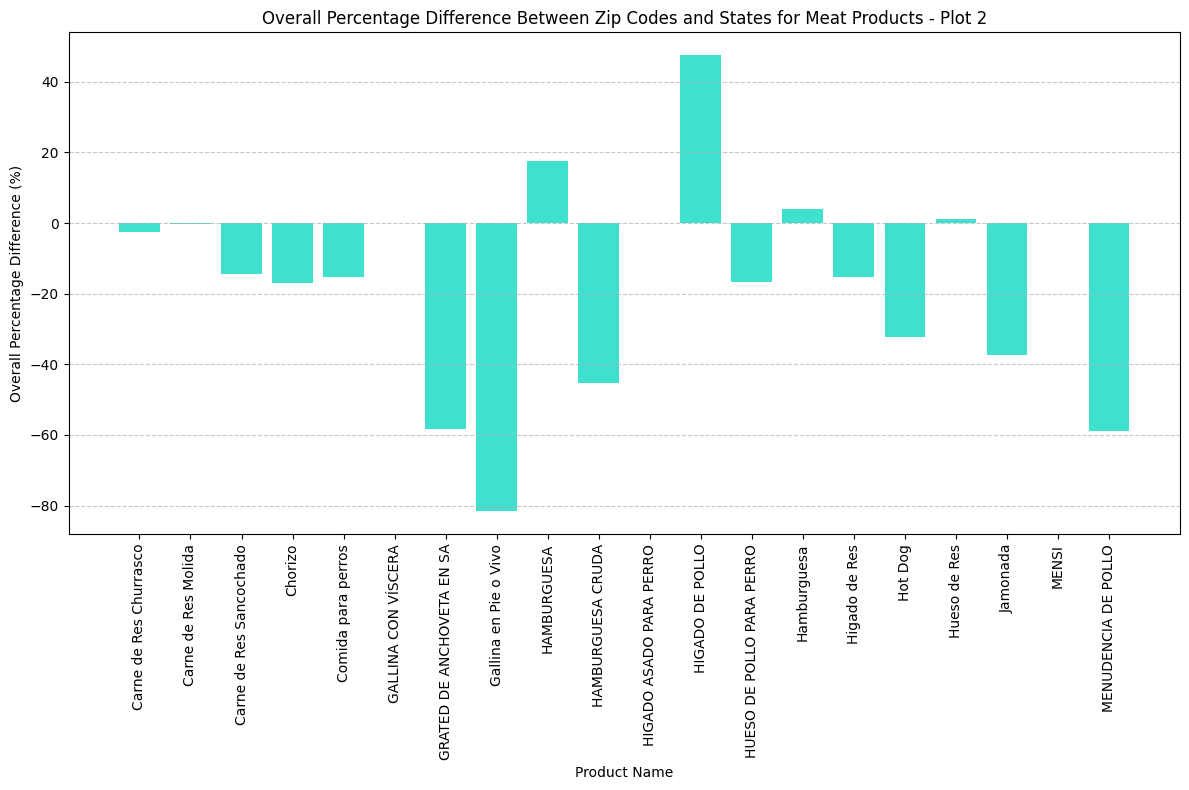

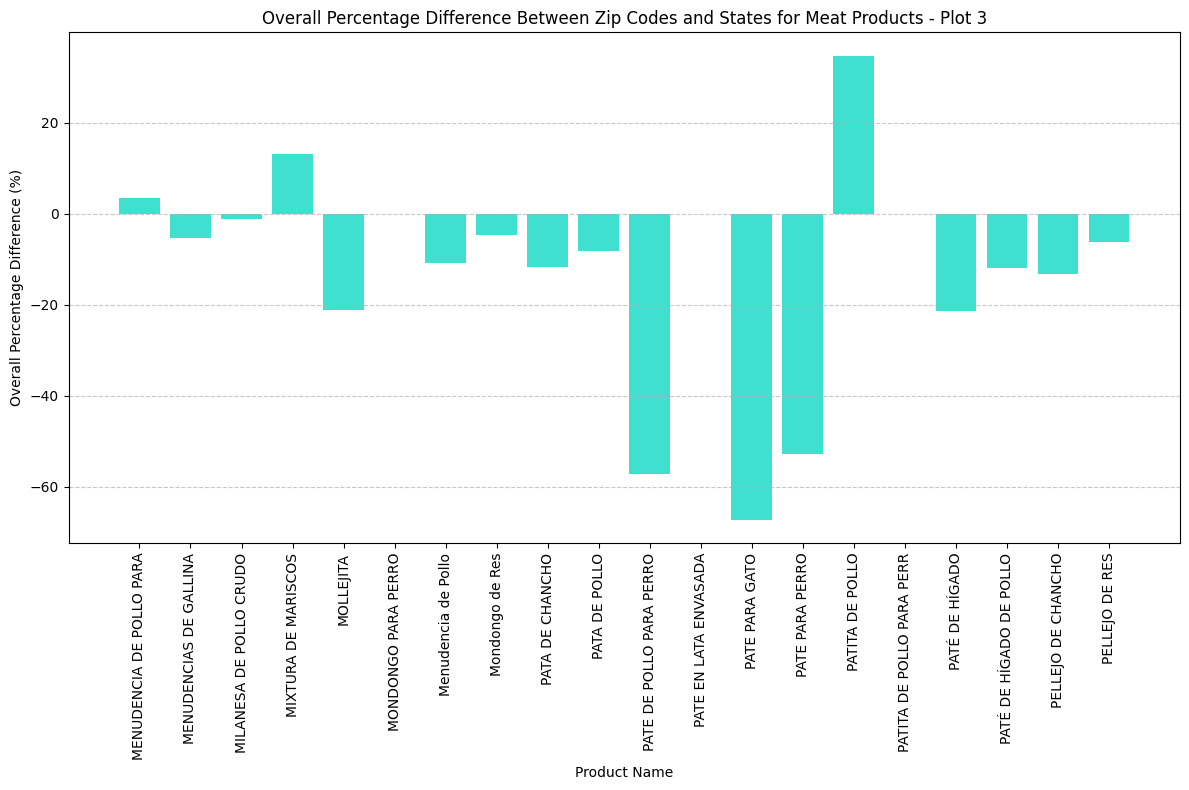

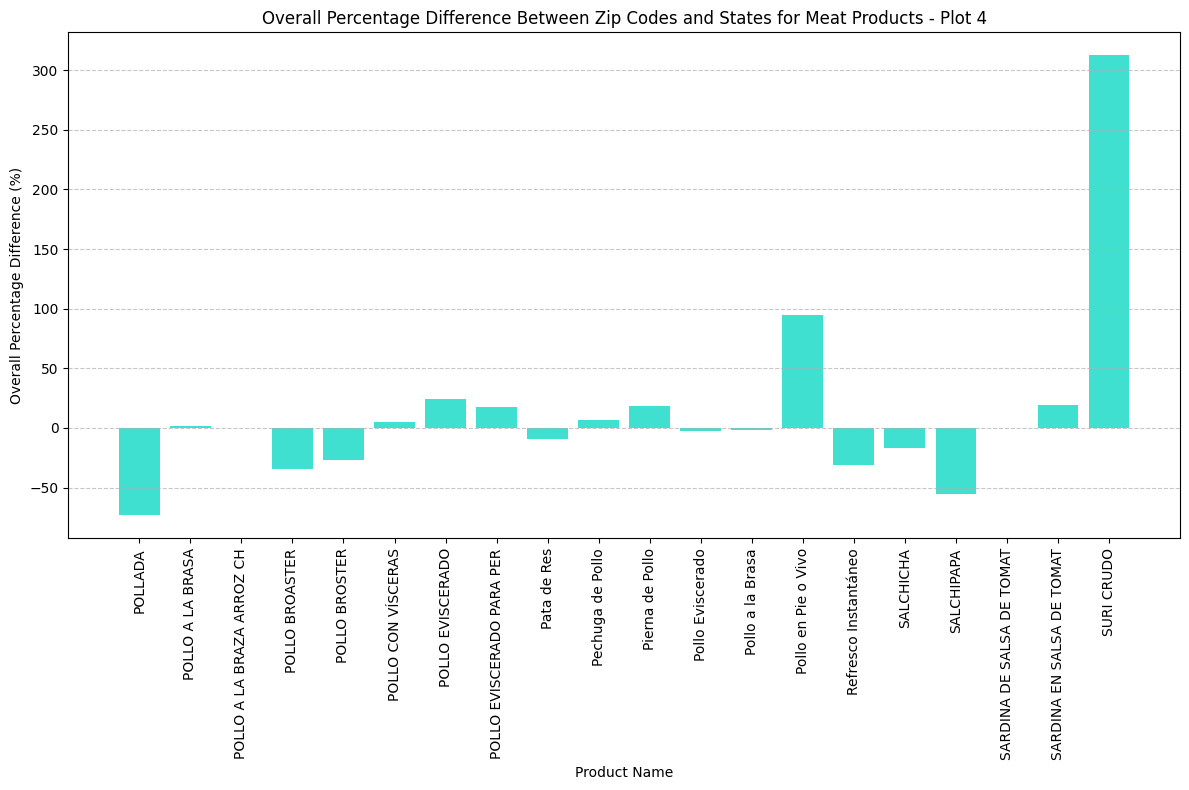

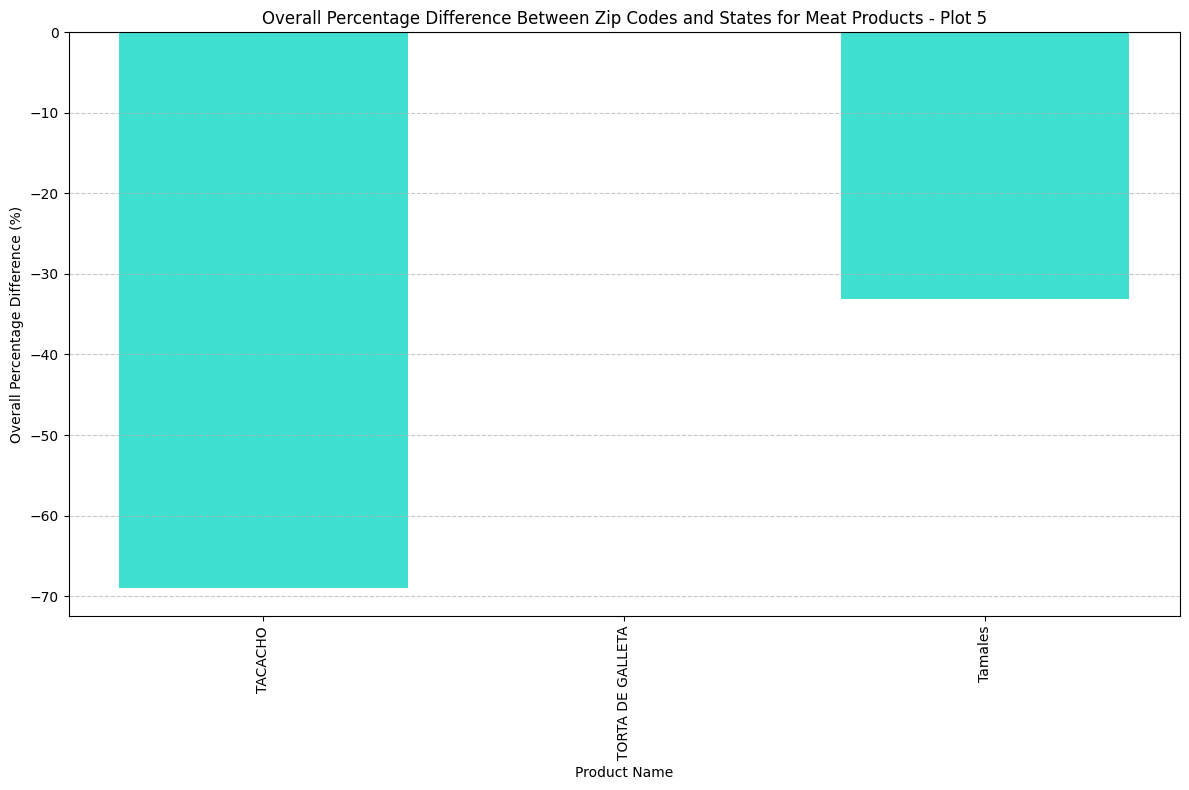

Overall percentage difference for ALITAS DE POLLO: -14.29%
Overall percentage difference for ANCHOVETA EN SALSA DE TOM: -22.15%
Overall percentage difference for CABEZA DE POLLO PARA PERR: 4.55%
Overall percentage difference for CACHITO: 3.09%
Overall percentage difference for CAIGUA: -2.96%
Overall percentage difference for CALABRESA: 15.38%
Overall percentage difference for CALABREZA: 21.12%
Overall percentage difference for CARNE DE CARACHUPA: 47.06%
Overall percentage difference for CARNE DE HUANGANA: 122.22%
Overall percentage difference for CARNE DE MAJAS: 47.10%
Overall percentage difference for CARNE DE MAJAZ: 17.31%
Overall percentage difference for CARNE DE SAJINO: 2.37%
Overall percentage difference for CARNE MAJAZ: 0.00%
Overall percentage difference for CAVANOSSI: -58.42%
Overall percentage difference for CECINA DE CHANCHO: -14.75%
Overall percentage difference for CHULETA DE CHANCHO: -81.94%
Overall percentage difference for COL CRESPA: -17.36%
Overall percentage differen

In [107]:
meat_products = category_dfs['meat_products']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = meat_products.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Meat Products', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Condiments and Spices**

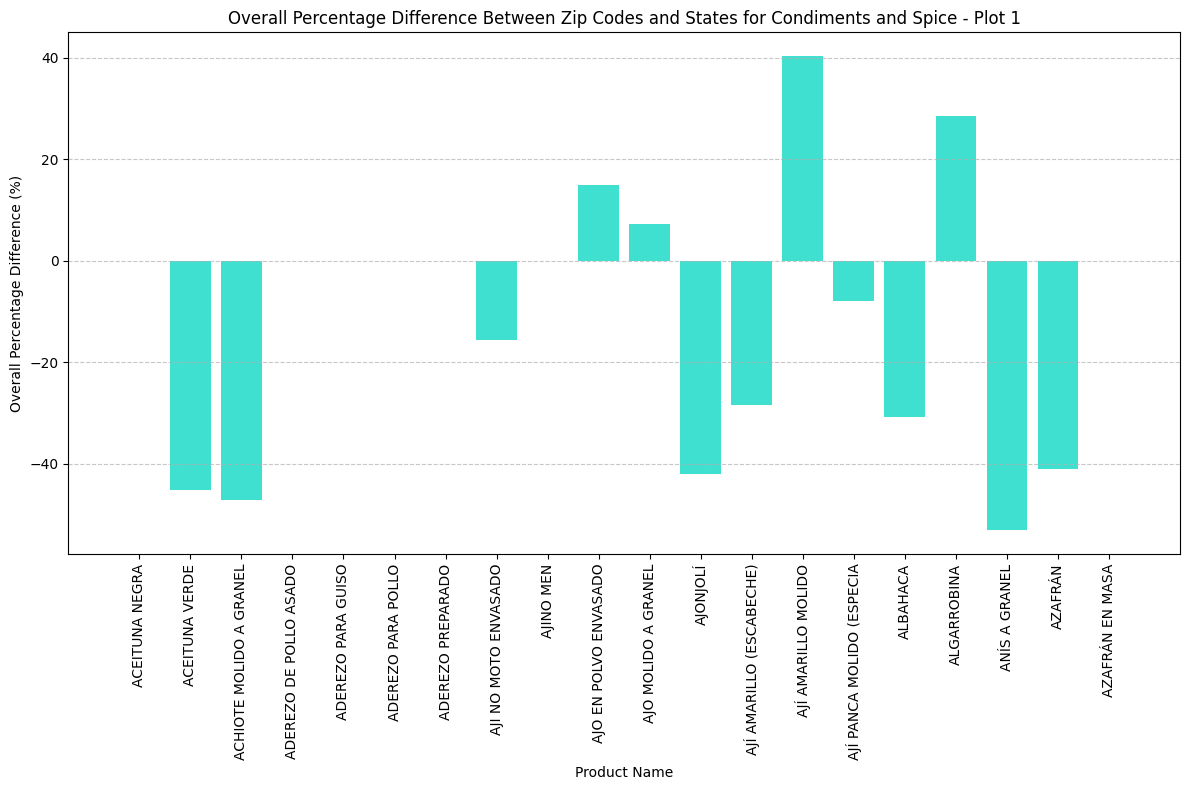

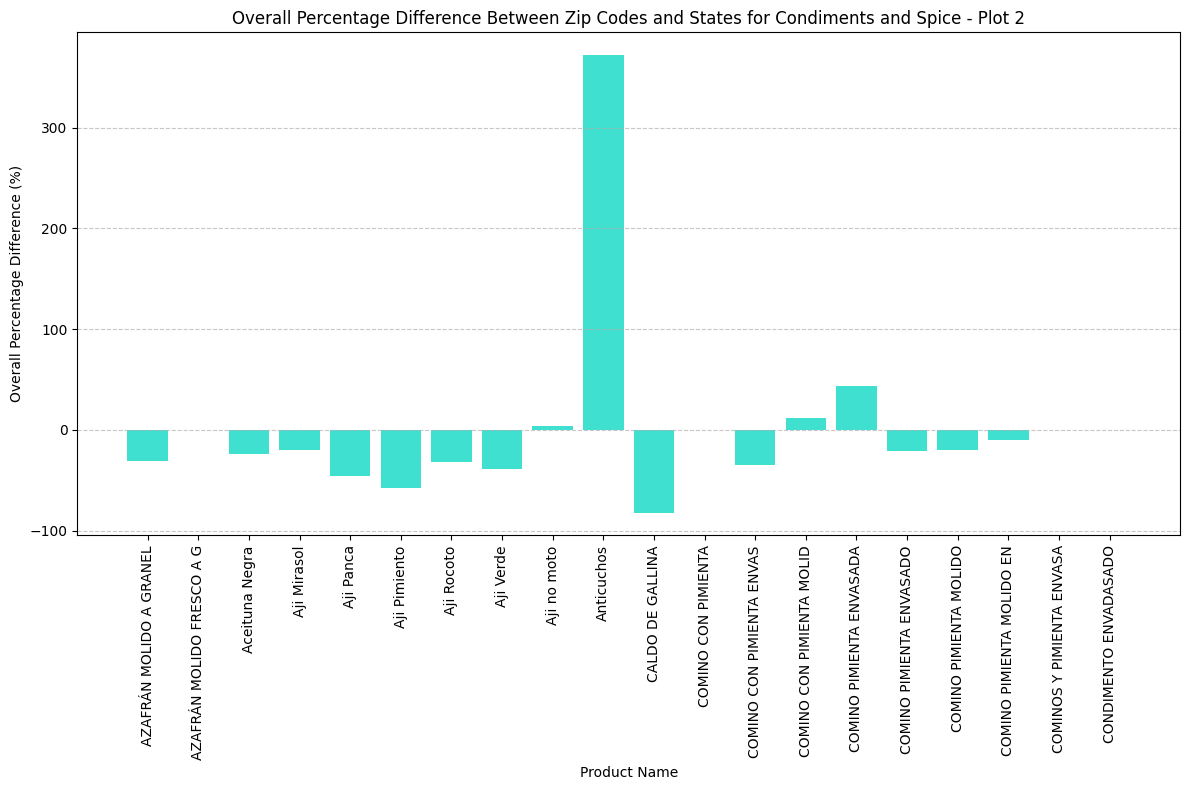

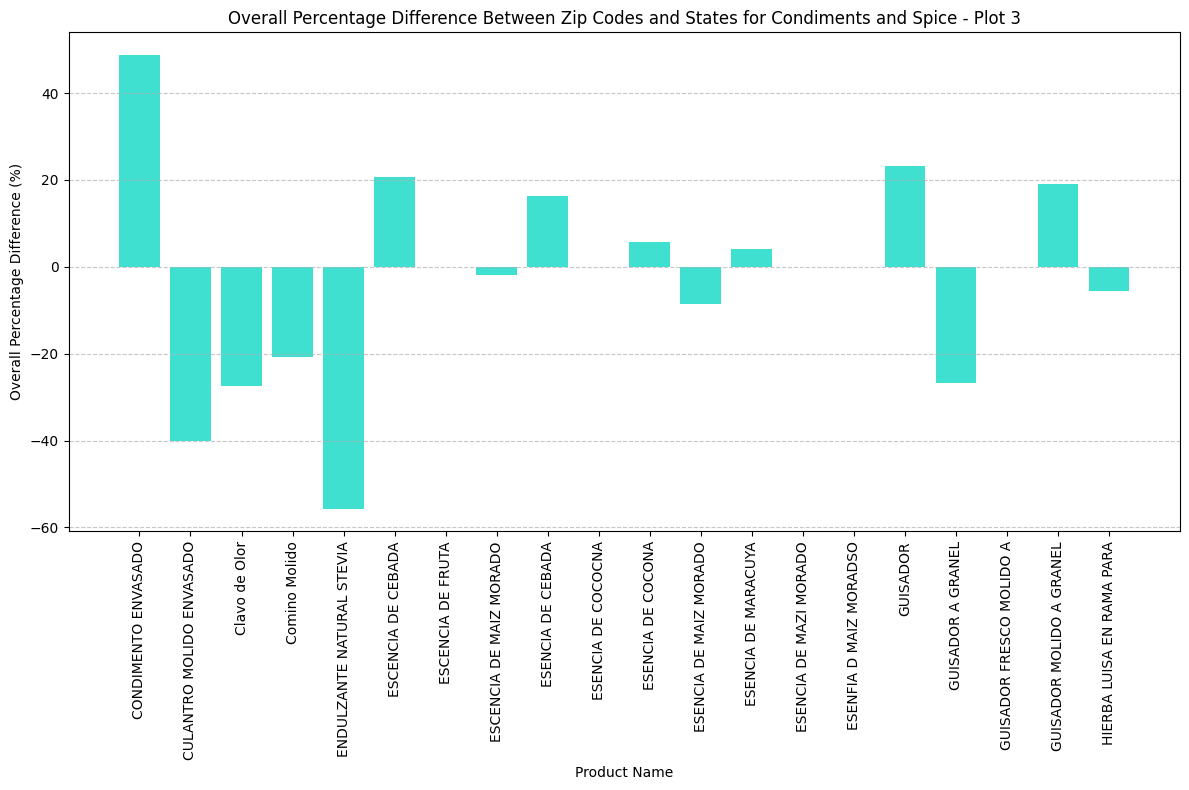

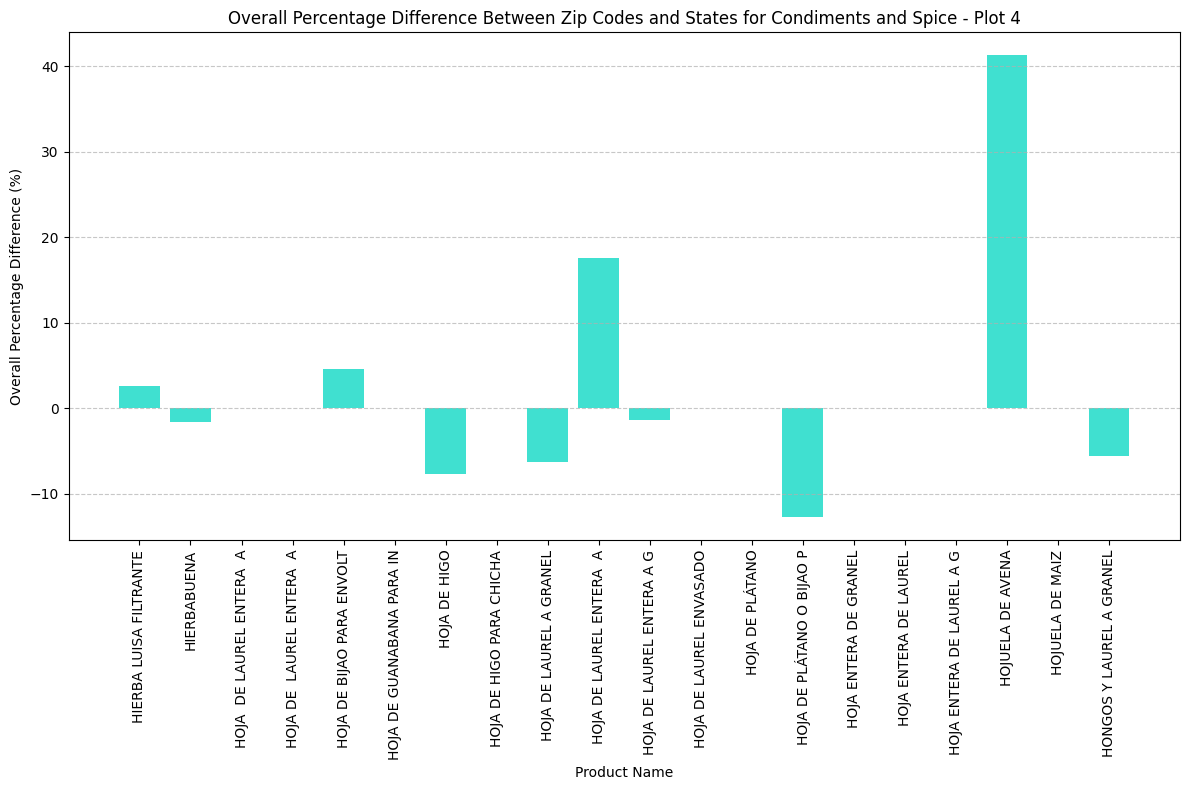

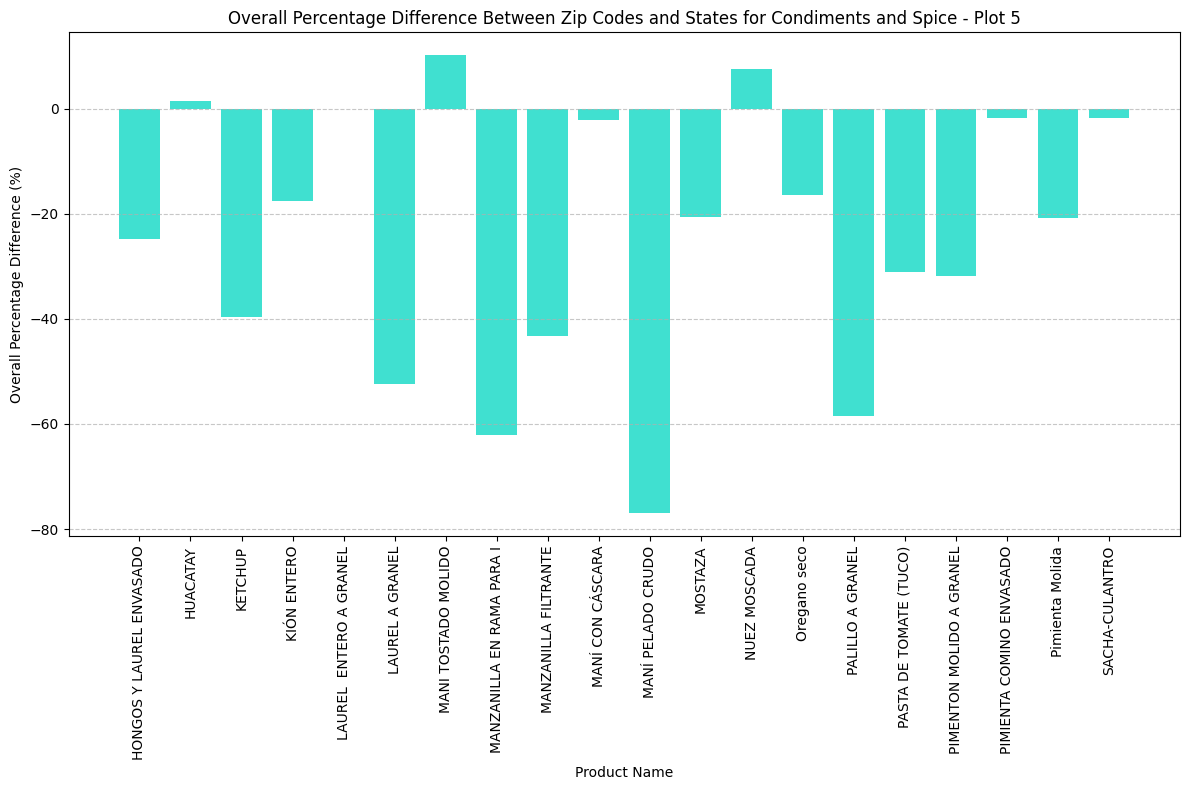

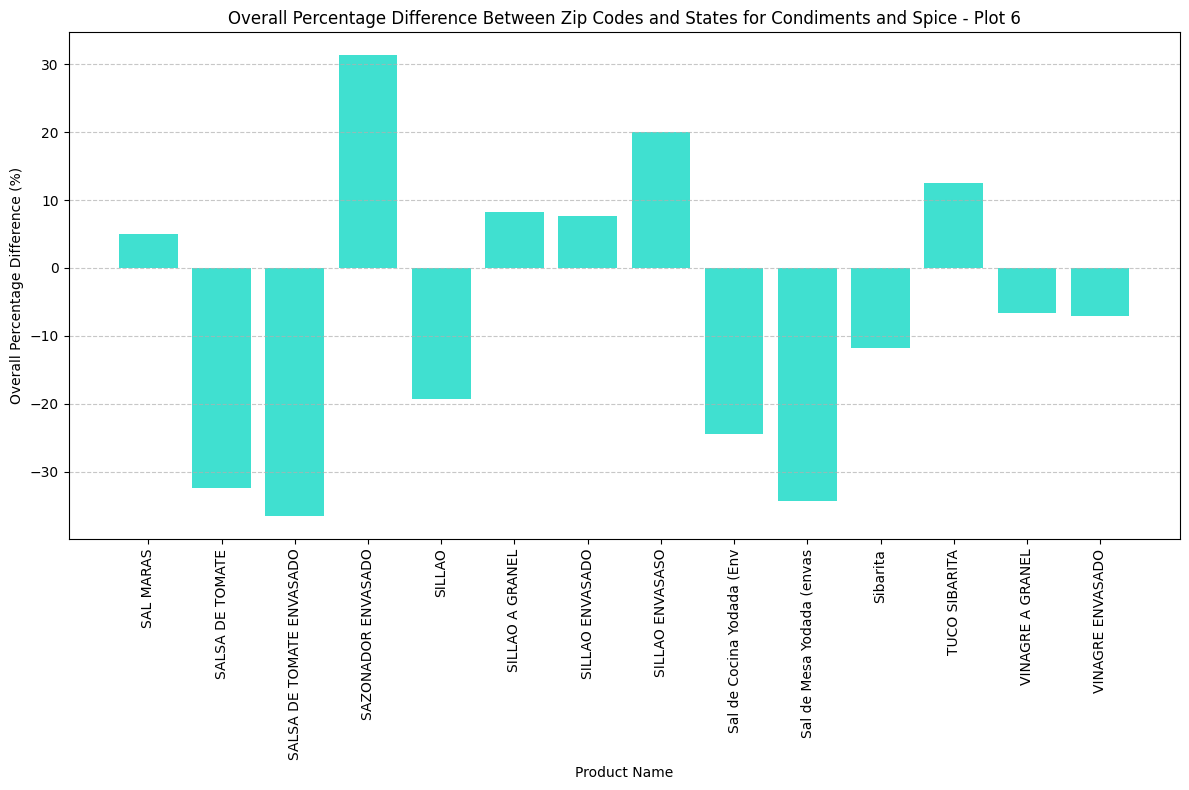

Overall percentage difference for ACEITUNA NEGRA: 0.00%
Overall percentage difference for ACEITUNA VERDE: -45.21%
Overall percentage difference for ACHIOTE MOLIDO A GRANEL: -47.26%
Overall percentage difference for ADEREZO DE POLLO ASADO: 0.00%
Overall percentage difference for ADEREZO PARA GUISO: 0.00%
Overall percentage difference for ADEREZO PARA POLLO: 0.00%
Overall percentage difference for ADEREZO PREPARADO: 0.00%
Overall percentage difference for AJI NO MOTO ENVASADO: -15.59%
Overall percentage difference for AJINO MEN: 0.00%
Overall percentage difference for AJO EN POLVO ENVASADO: 15.03%
Overall percentage difference for AJO MOLIDO A GRANEL: 7.24%
Overall percentage difference for AJONJOLÍ: -42.05%
Overall percentage difference for AJÍ AMARILLO (ESCABECHE): -28.42%
Overall percentage difference for AJÍ AMARILLO MOLIDO: 40.38%
Overall percentage difference for AJÍ PANCA MOLIDO (ESPECIA: -7.93%
Overall percentage difference for ALBAHACA: -30.74%
Overall percentage difference for 

In [108]:
condiments_and_spices = category_dfs['condiments_and_spices']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = condiments_and_spices.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Condiments and Spice', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Grains and Cereals**

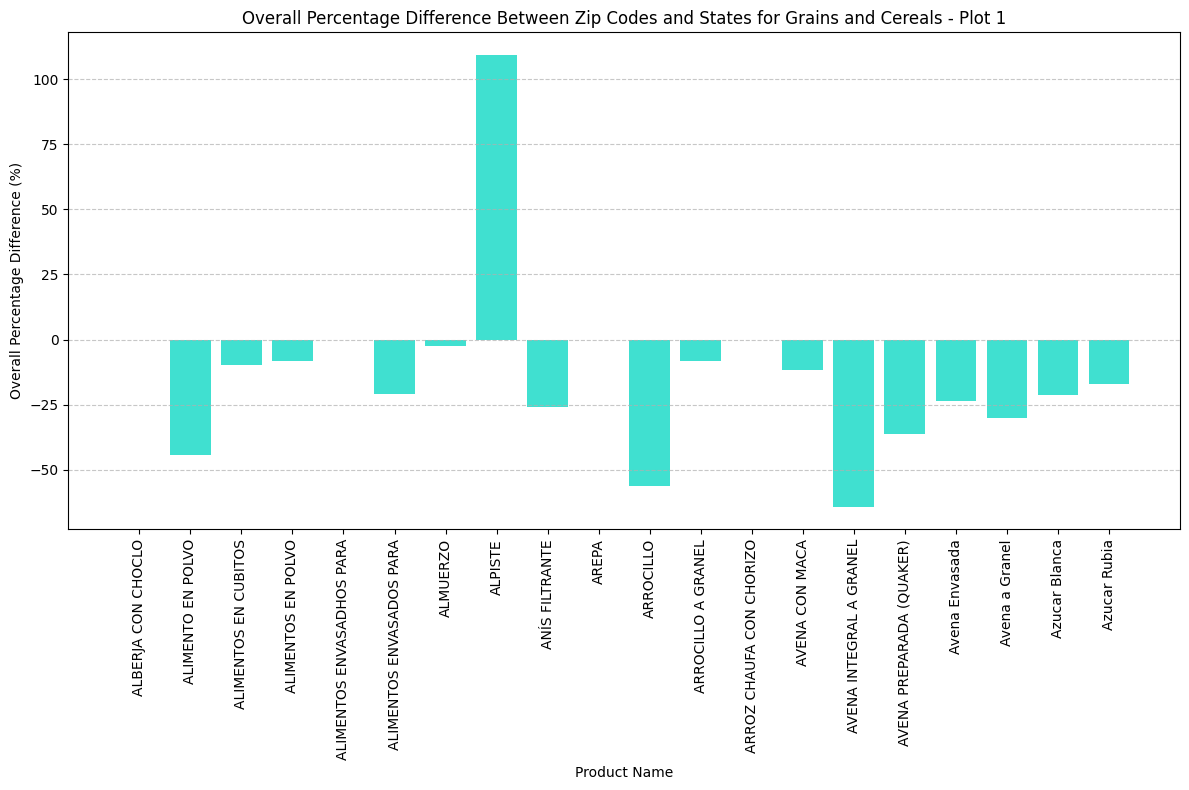

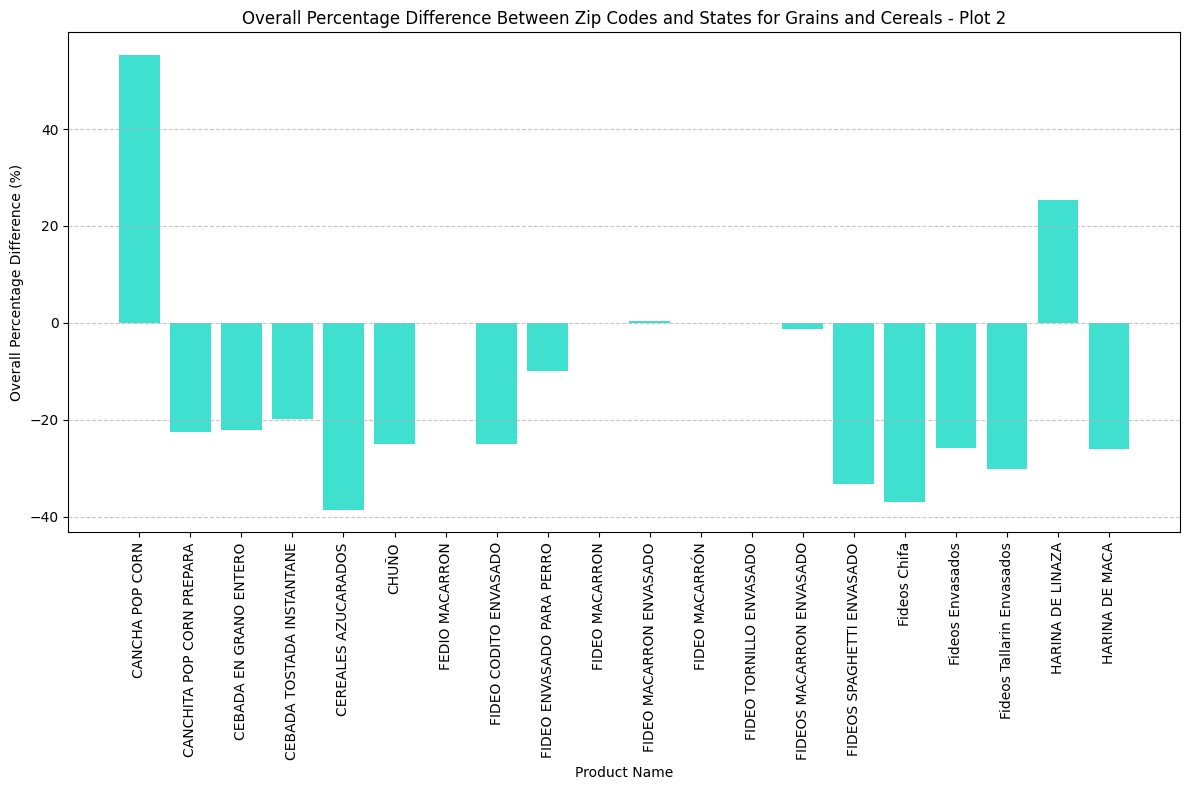

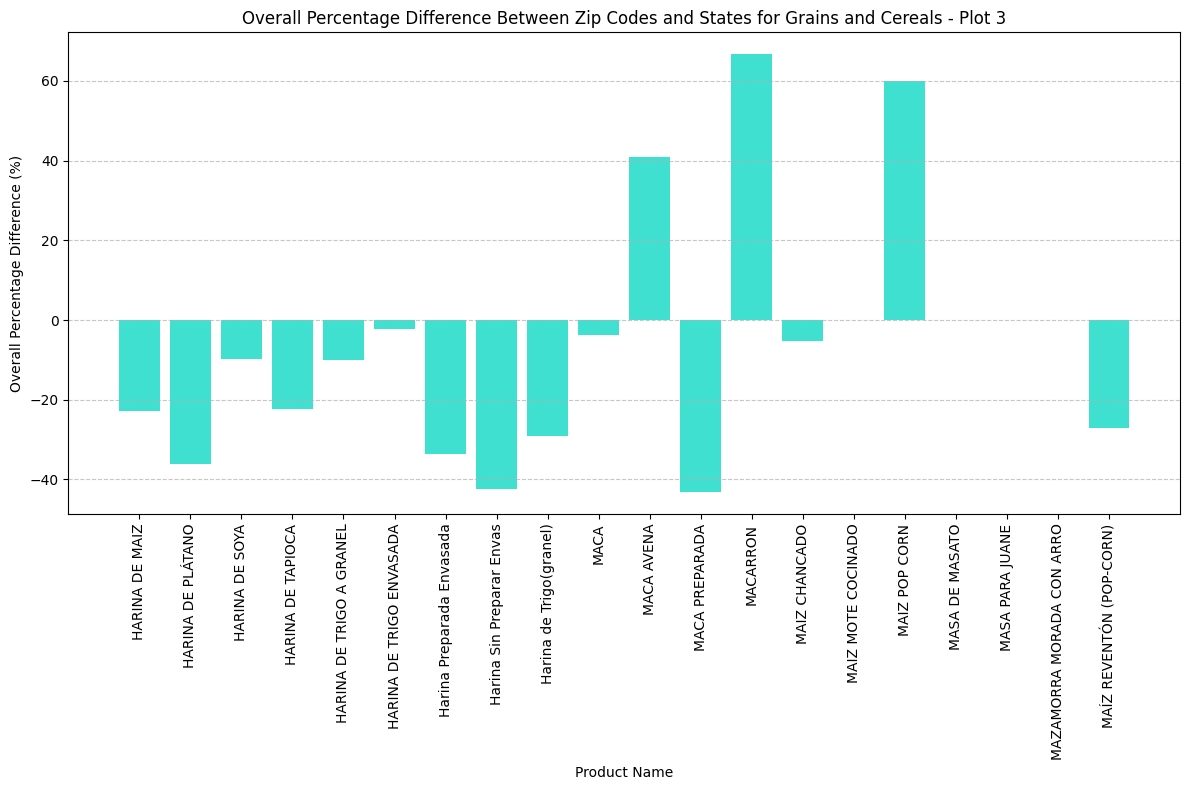

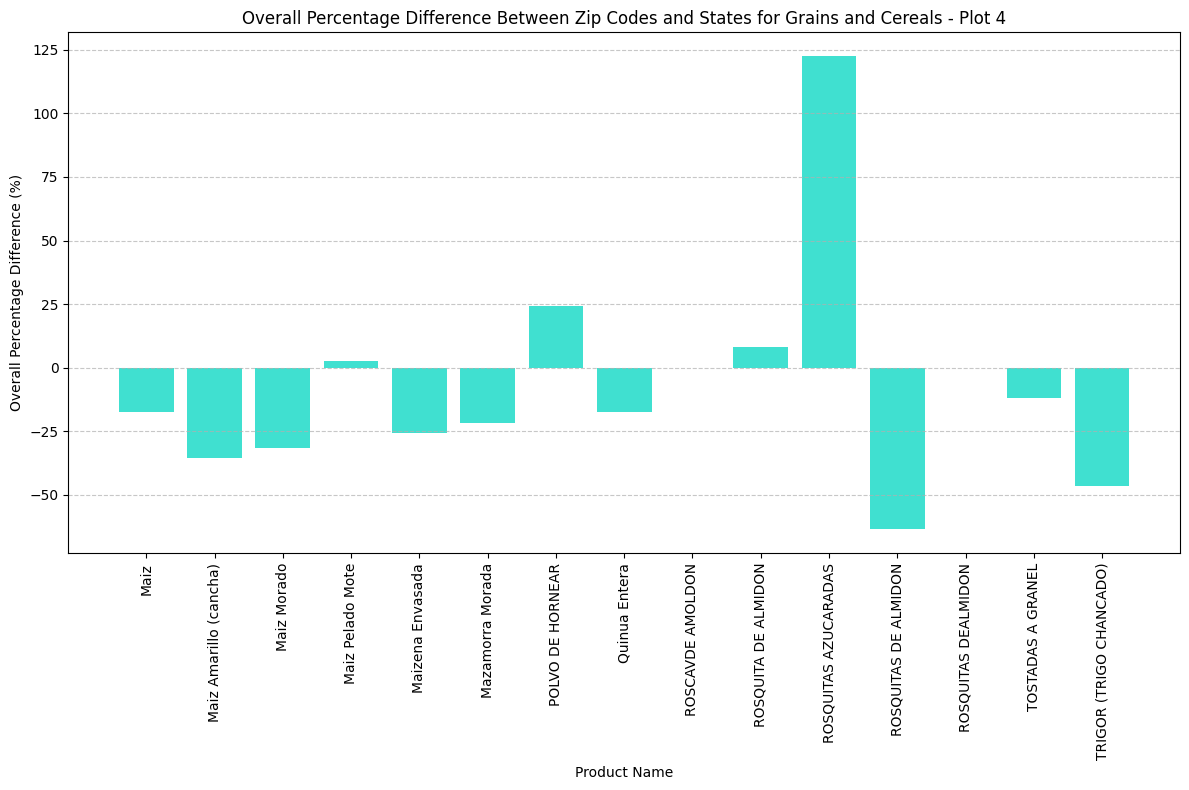

Overall percentage difference for ALBERJA CON CHOCLO: 0.00%
Overall percentage difference for ALIMENTO EN POLVO: -44.44%
Overall percentage difference for ALIMENTOS EN CUBITOS: -9.60%
Overall percentage difference for ALIMENTOS EN POLVO: -8.13%
Overall percentage difference for ALIMENTOS ENVASADHOS PARA: 0.00%
Overall percentage difference for ALIMENTOS ENVASADOS PARA: -21.08%
Overall percentage difference for ALMUERZO: -2.56%
Overall percentage difference for ALPISTE: 109.29%
Overall percentage difference for ANÍS FILTRANTE: -26.00%
Overall percentage difference for AREPA: 0.00%
Overall percentage difference for ARROCILLO: -56.29%
Overall percentage difference for ARROCILLO A GRANEL: -8.36%
Overall percentage difference for ARROZ CHAUFA CON CHORIZO: 0.00%
Overall percentage difference for AVENA CON MACA: -11.76%
Overall percentage difference for AVENA INTEGRAL A GRANEL: -64.21%
Overall percentage difference for AVENA PREPARADA (QUAKER): -36.44%
Overall percentage difference for Avena 

In [109]:
grains_and_cereals = category_dfs['grains_and_cereals']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = grains_and_cereals.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Grains and Cereals', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Fish and Seafood**

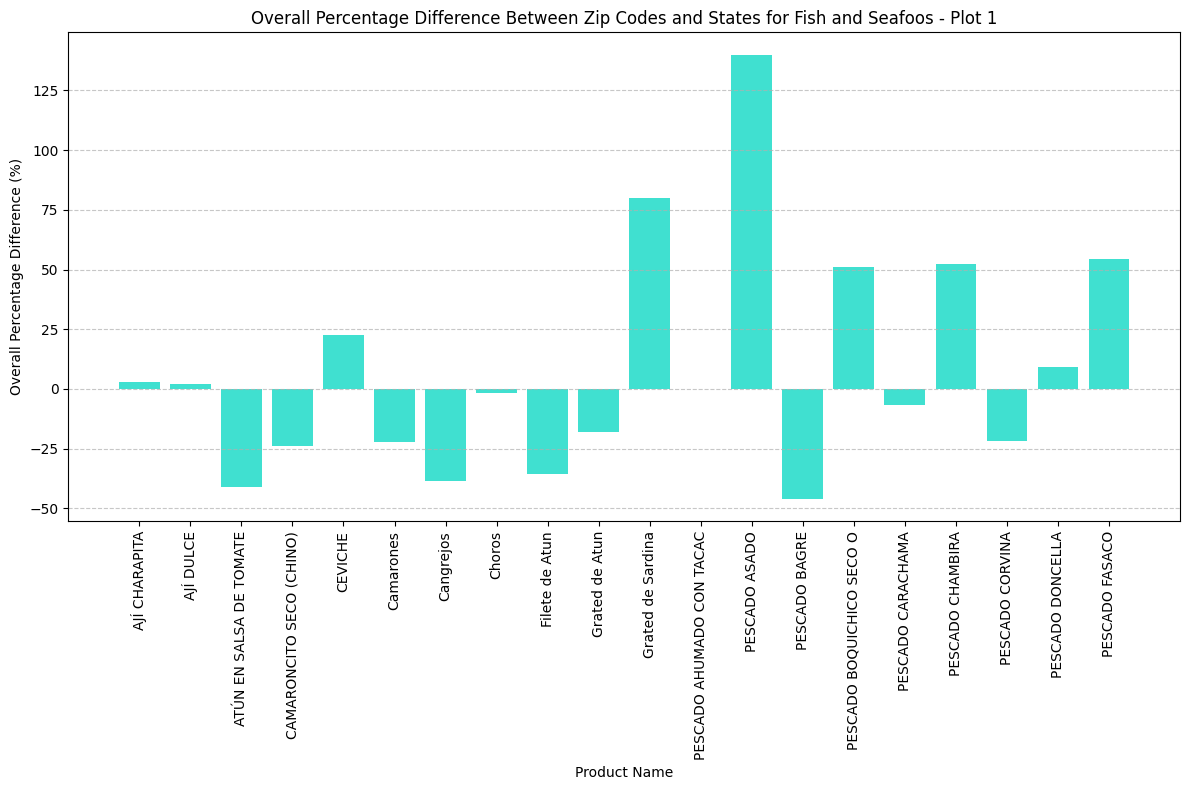

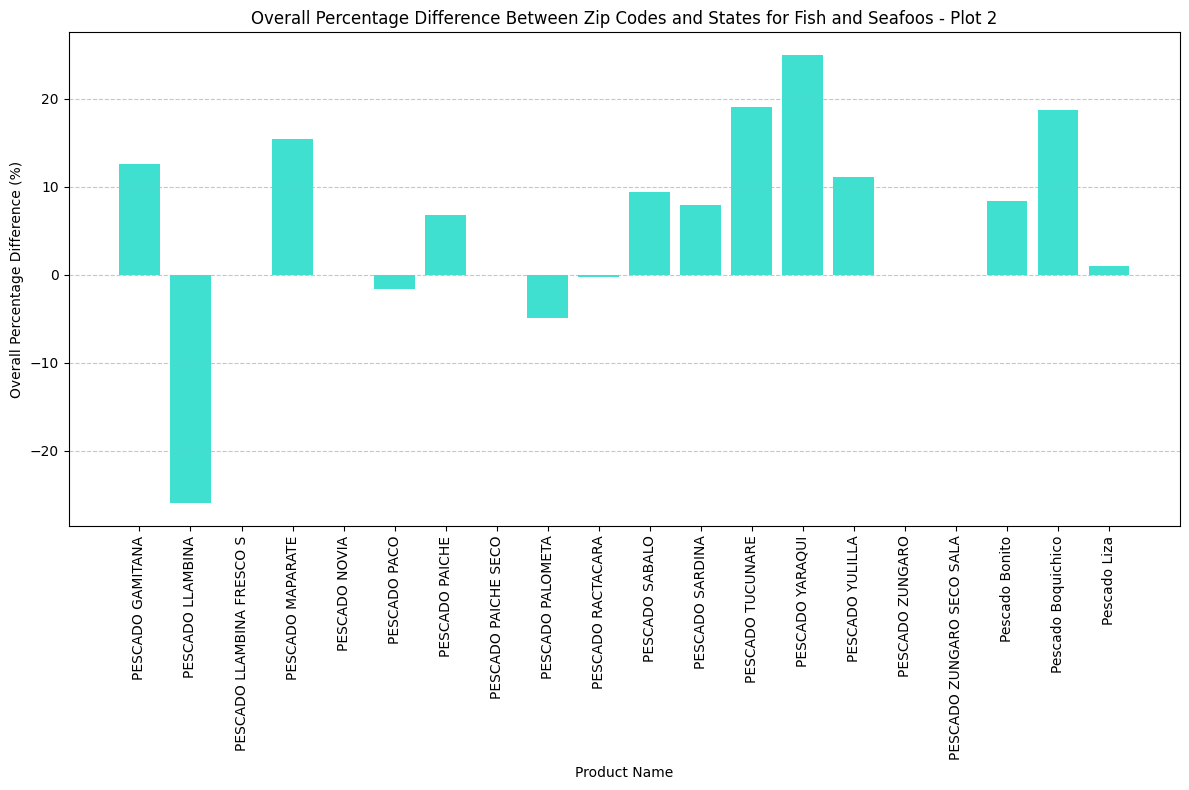

Overall percentage difference for AJÍ CHARAPITA: 2.81%
Overall percentage difference for AJÍ DULCE: 2.02%
Overall percentage difference for ATÚN EN SALSA DE TOMATE: -40.86%
Overall percentage difference for CAMARONCITO SECO (CHINO): -23.97%
Overall percentage difference for CEVICHE: 22.74%
Overall percentage difference for Camarones: -22.10%
Overall percentage difference for Cangrejos: -38.40%
Overall percentage difference for Choros: -1.69%
Overall percentage difference for Filete de Atun: -35.66%
Overall percentage difference for Grated de Atun: -17.98%
Overall percentage difference for Grated de Sardina: 80.14%
Overall percentage difference for PESCADO AHUMADO CON TACAC: 0.00%
Overall percentage difference for PESCADO ASADO: 140.00%
Overall percentage difference for PESCADO BAGRE: -46.11%
Overall percentage difference for PESCADO BOQUICHICO SECO O: 51.11%
Overall percentage difference for PESCADO CARACHAMA: -6.75%
Overall percentage difference for PESCADO CHAMBIRA: 52.17%
Overall pe

In [110]:
fish_and_seafood = category_dfs['fish_and_seafood']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = fish_and_seafood.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Fish and Seafoos', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Oils and Fats**

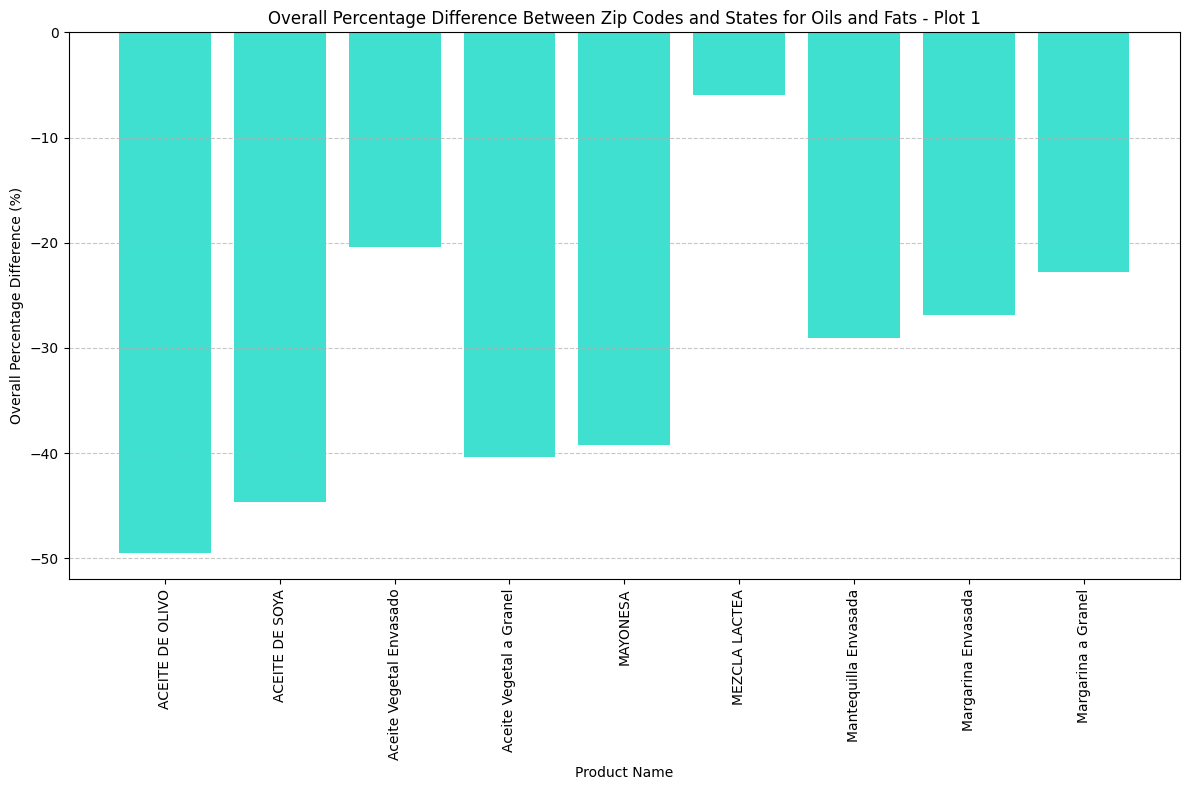

Overall percentage difference for ACEITE DE OLIVO: -49.48%
Overall percentage difference for ACEITE DE SOYA: -44.63%
Overall percentage difference for Aceite Vegetal Envasado: -20.40%
Overall percentage difference for Aceite Vegetal a Granel: -40.34%
Overall percentage difference for MAYONESA: -39.25%
Overall percentage difference for MEZCLA LACTEA: -5.93%
Overall percentage difference for Mantequilla Envasada: -29.09%
Overall percentage difference for Margarina Envasada: -26.86%
Overall percentage difference for Margarina a Granel: -22.76%


In [111]:
oils_and_fats = category_dfs['oils_and_fats']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = oils_and_fats.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Oils and Fats', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Legumes and Tubers**

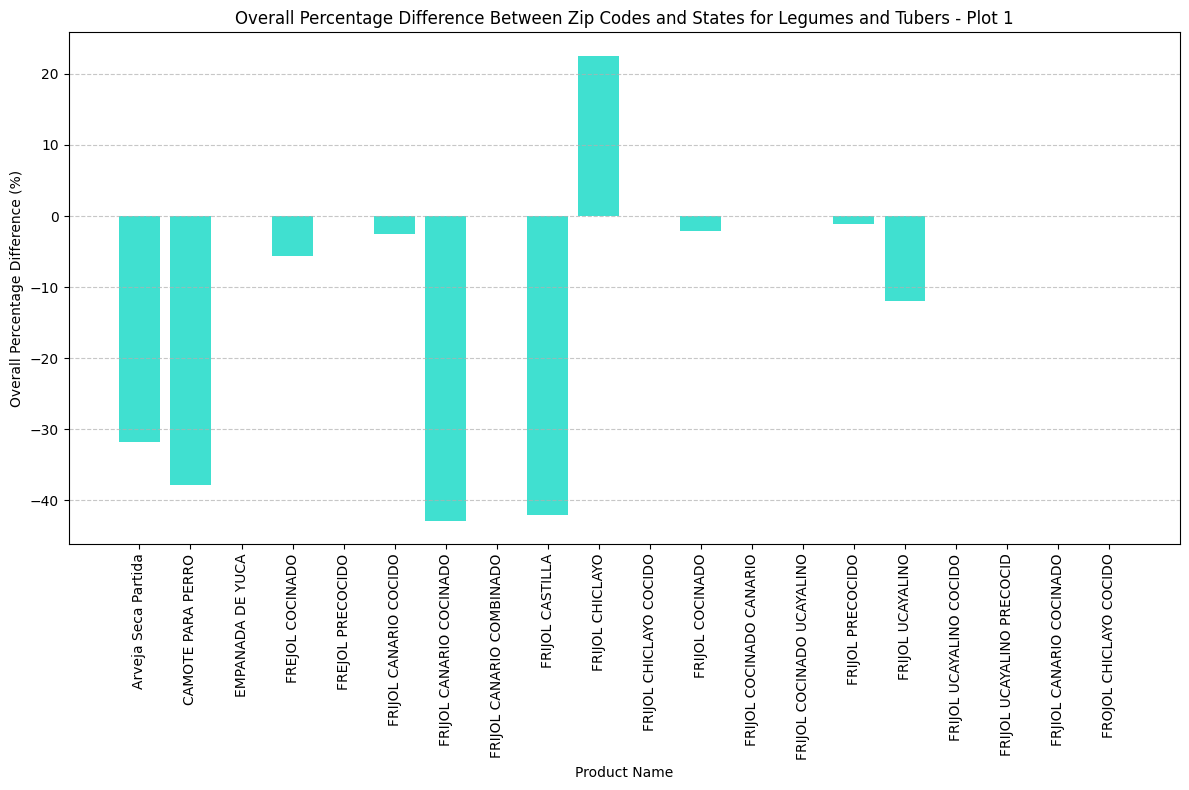

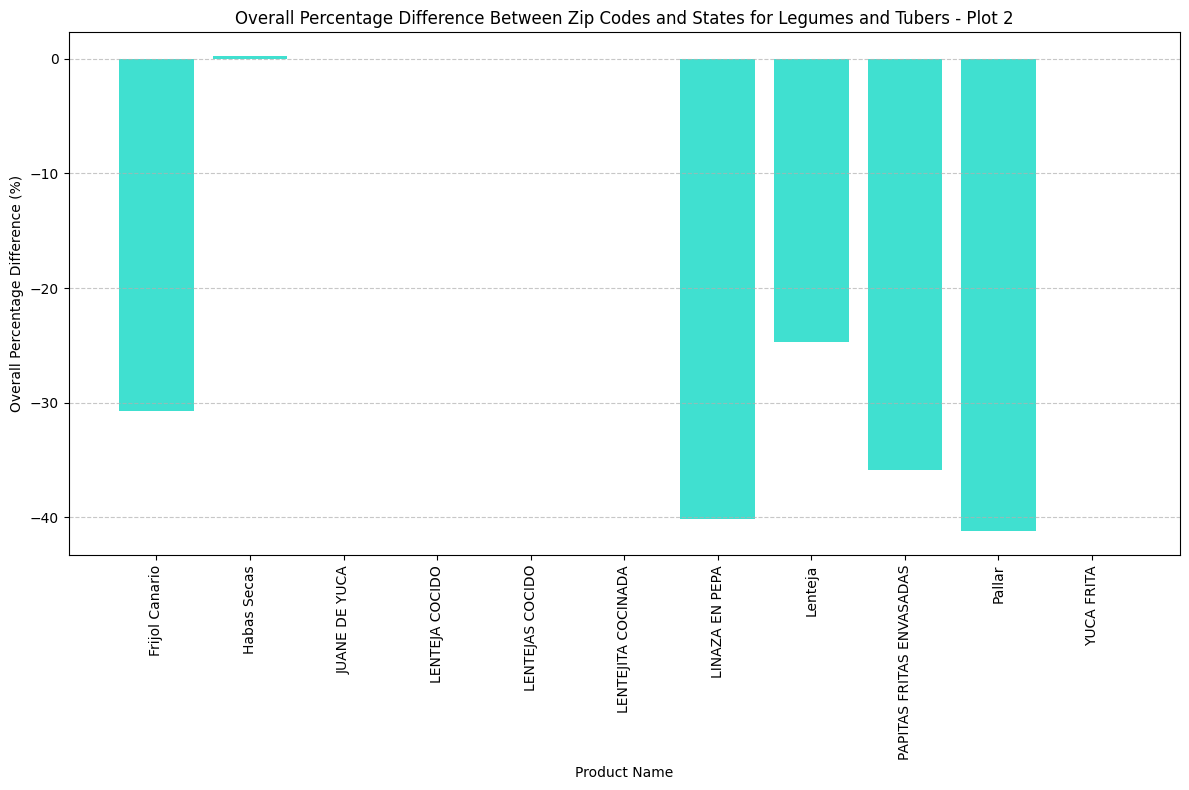

Overall percentage difference for Arveja Seca Partida: -31.76%
Overall percentage difference for CAMOTE PARA PERRO: -37.79%
Overall percentage difference for EMPANADA DE YUCA: 0.00%
Overall percentage difference for FREJOL COCINADO: -5.56%
Overall percentage difference for FREJOL PRECOCIDO: 0.00%
Overall percentage difference for FRIJOL CANARIO COCIDO: -2.46%
Overall percentage difference for FRIJOL CANARIO COCINADO: -42.86%
Overall percentage difference for FRIJOL CANARIO COMBINADO: 0.00%
Overall percentage difference for FRIJOL CASTILLA: -42.03%
Overall percentage difference for FRIJOL CHICLAYO: 22.58%
Overall percentage difference for FRIJOL CHICLAYO COCIDO: 0.00%
Overall percentage difference for FRIJOL COCINADO: -2.17%
Overall percentage difference for FRIJOL COCINADO CANARIO: 0.00%
Overall percentage difference for FRIJOL COCINADO UCAYALINO: 0.00%
Overall percentage difference for FRIJOL PRECOCIDO: -1.18%
Overall percentage difference for FRIJOL UCAYALINO: -12.02%
Overall percent

In [112]:
legumes_and_tubers = category_dfs['legumes_and_tubers']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = legumes_and_tubers.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Legumes and Tubers', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Beverages and Drinks**

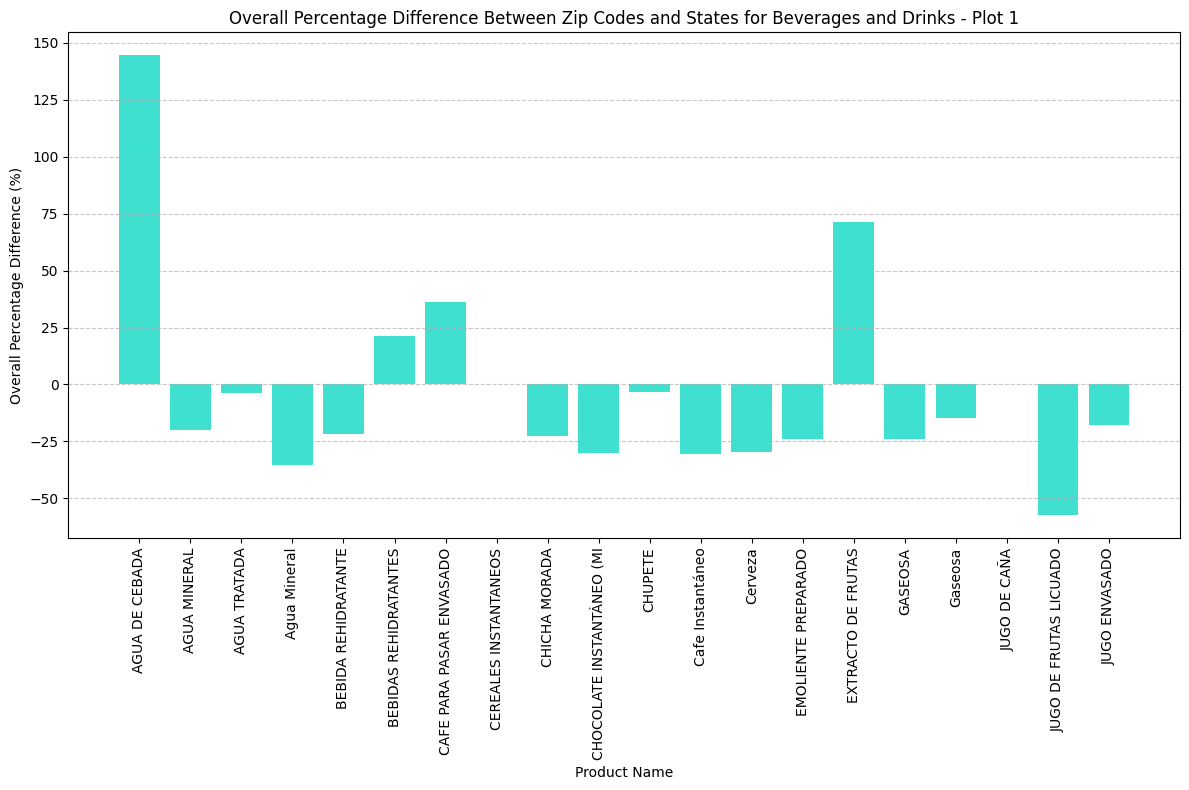

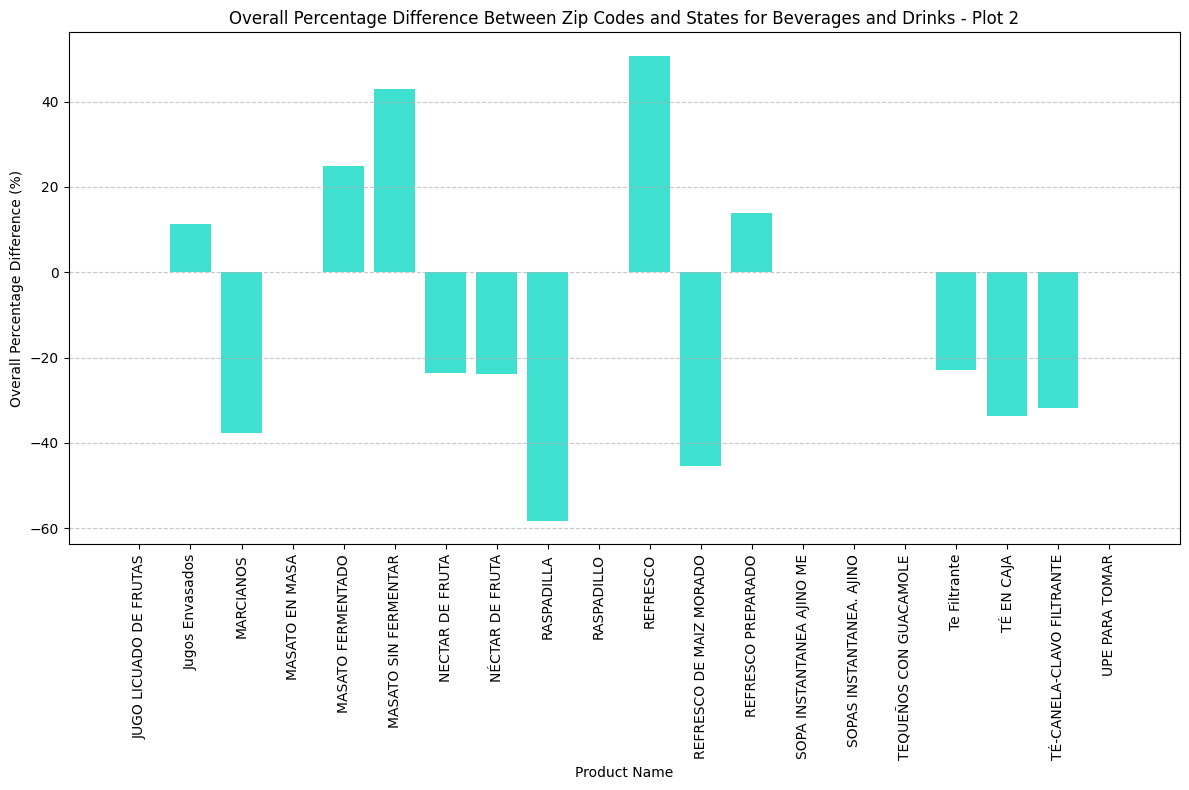

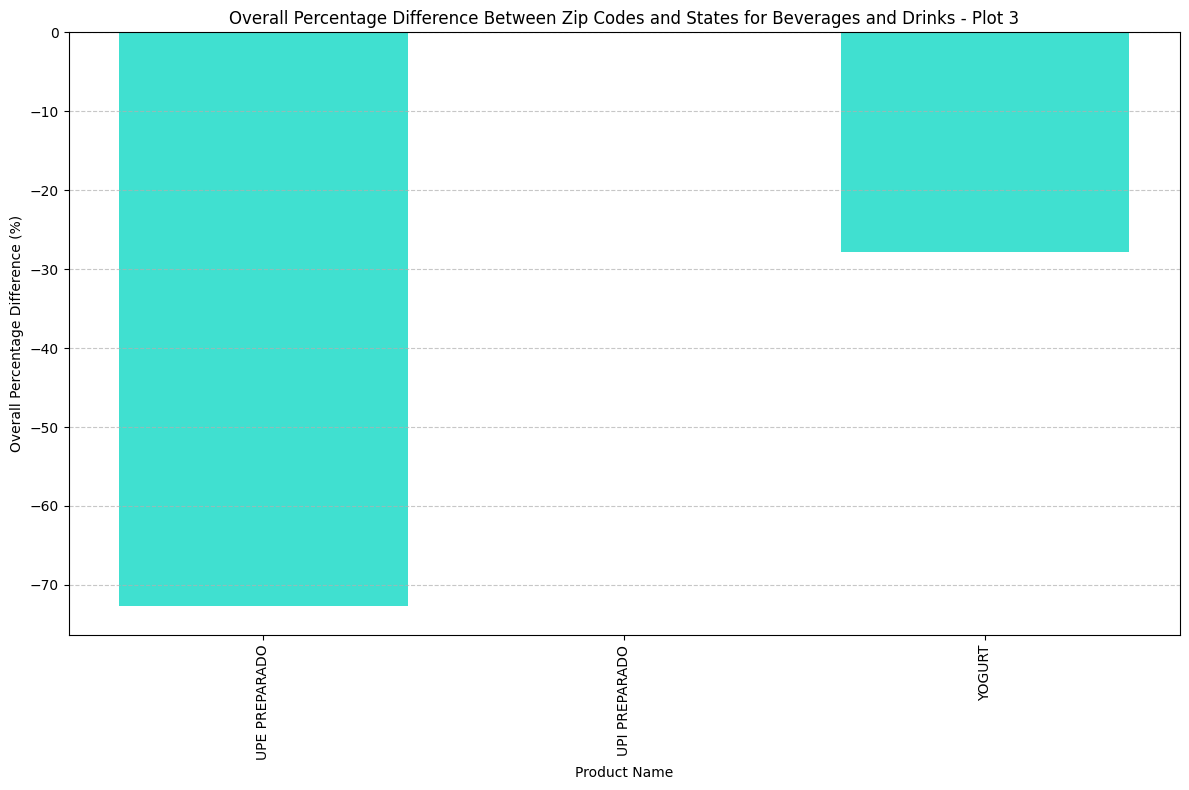

Overall percentage difference for AGUA DE CEBADA: 144.49%
Overall percentage difference for AGUA MINERAL: -20.18%
Overall percentage difference for AGUA TRATADA: -3.86%
Overall percentage difference for Agua Mineral: -35.47%
Overall percentage difference for BEBIDA REHIDRATANTE: -21.74%
Overall percentage difference for BEBIDAS REHIDRATANTES: 21.23%
Overall percentage difference for CAFE PARA PASAR ENVASADO: 36.11%
Overall percentage difference for CEREALES INSTANTANEOS: 0.00%
Overall percentage difference for CHICHA MORADA: -22.69%
Overall percentage difference for CHOCOLATE INSTANTÁNEO (MI: -30.10%
Overall percentage difference for CHUPETE: -3.33%
Overall percentage difference for Cafe Instantáneo: -30.56%
Overall percentage difference for Cerveza: -29.60%
Overall percentage difference for EMOLIENTE PREPARADO: -23.81%
Overall percentage difference for EXTRACTO DE FRUTAS: 71.43%
Overall percentage difference for GASEOSA: -24.03%
Overall percentage difference for Gaseosa: -14.71%
Overa

In [113]:
beverages_and_drinks = category_dfs['beverages_and_drinks']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = beverages_and_drinks.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Beverages and Drinks', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

# **Vegetables**

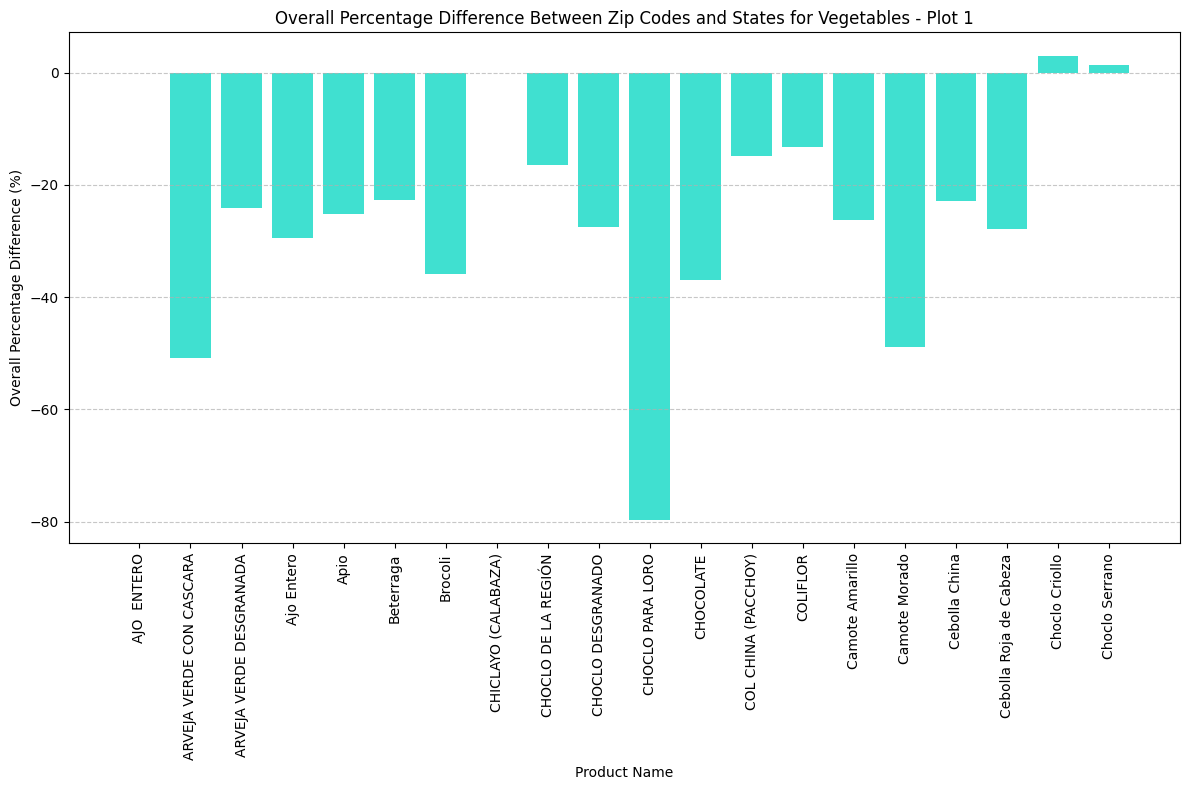

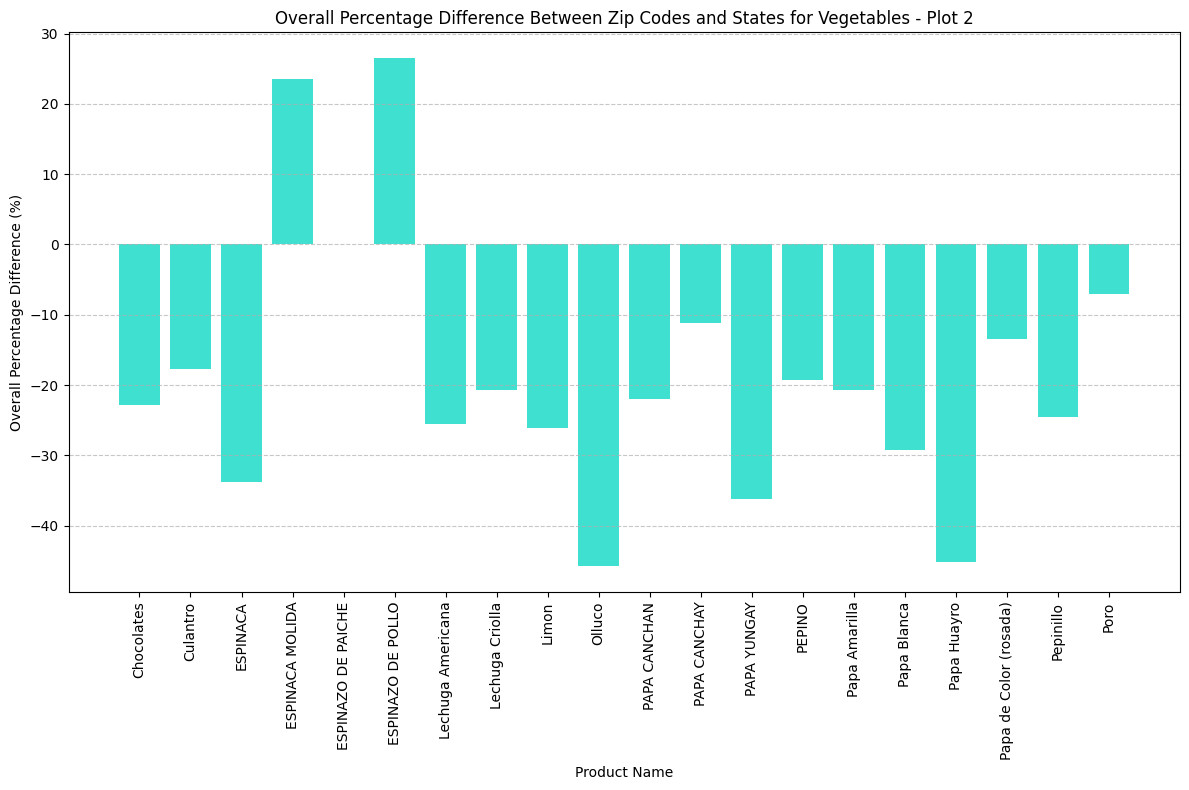

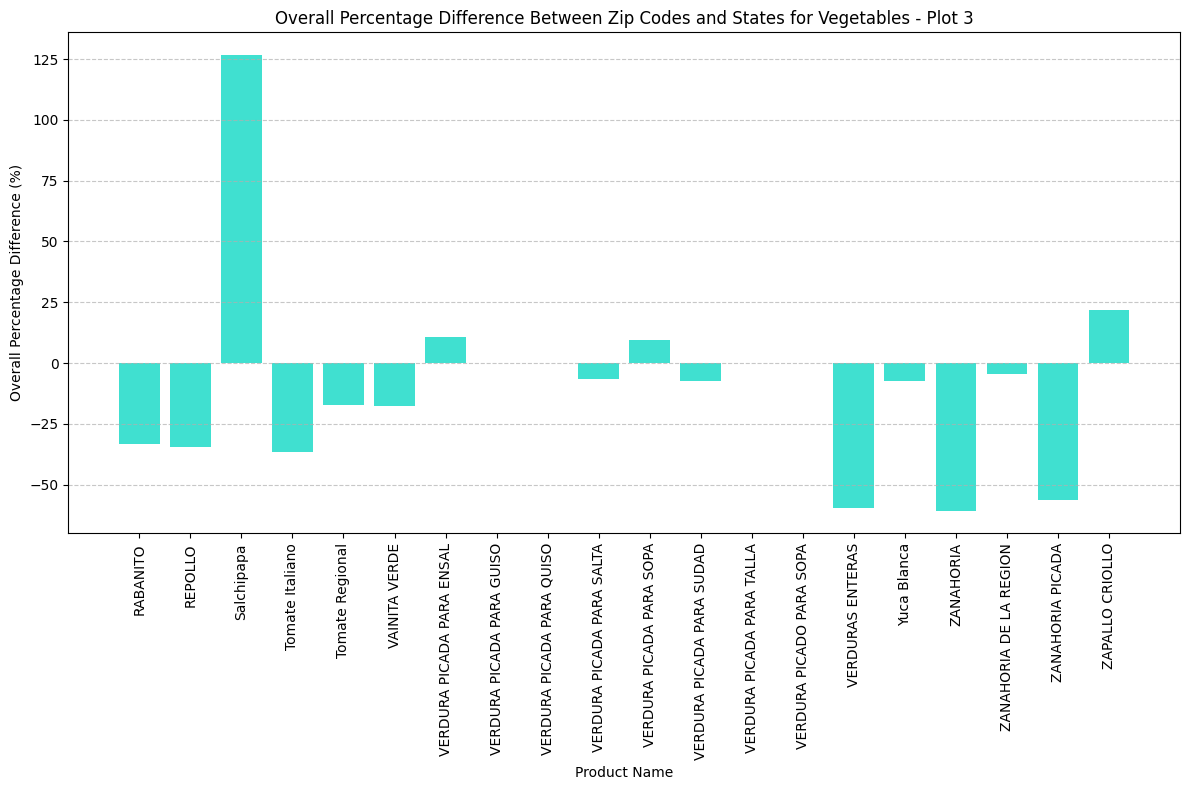

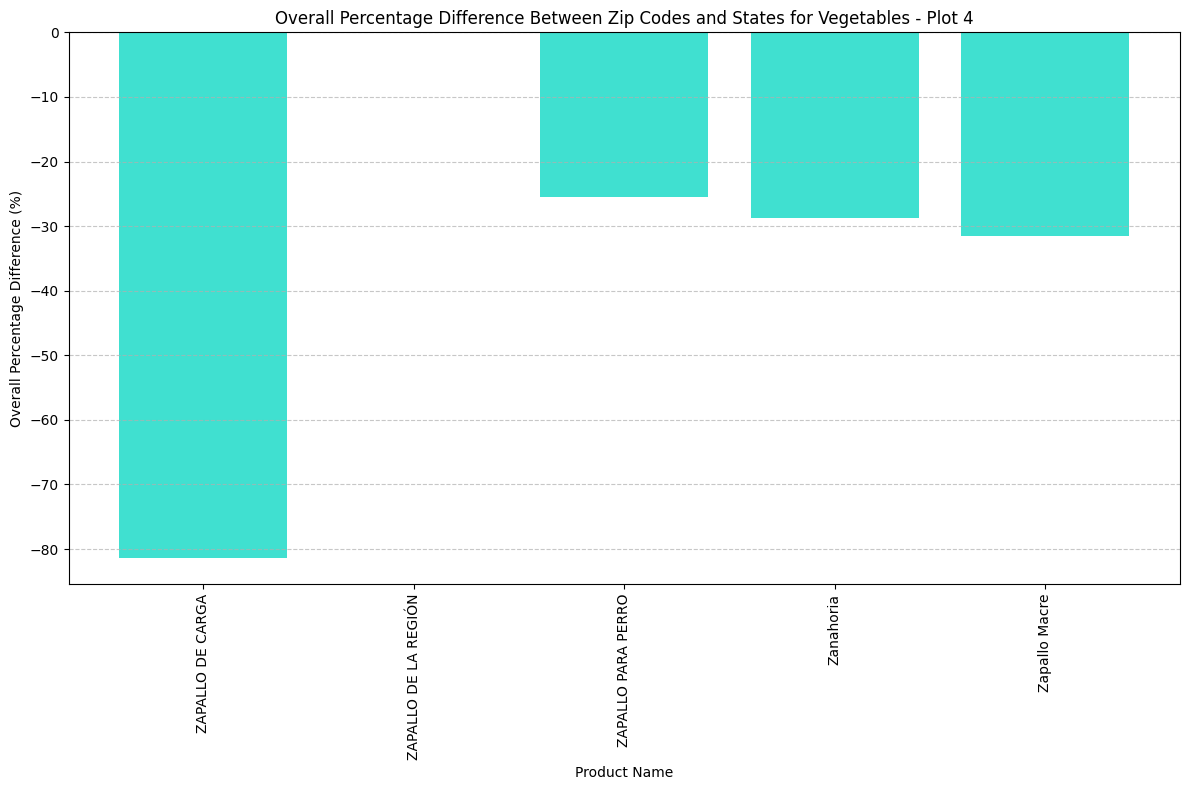

Overall percentage difference for AJO  ENTERO: 0.00%
Overall percentage difference for ARVEJA VERDE CON CASCARA: -50.86%
Overall percentage difference for ARVEJA VERDE DESGRANADA: -24.13%
Overall percentage difference for Ajo Entero: -29.44%
Overall percentage difference for Apio: -25.11%
Overall percentage difference for Beterraga: -22.63%
Overall percentage difference for Brocoli: -35.94%
Overall percentage difference for CHICLAYO (CALABAZA): 0.00%
Overall percentage difference for CHOCLO DE LA REGIÓN: -16.49%
Overall percentage difference for CHOCLO DESGRANADO: -27.46%
Overall percentage difference for CHOCLO PARA LORO: -79.73%
Overall percentage difference for CHOCOLATE: -37.01%
Overall percentage difference for COL CHINA (PACCHOY): -14.91%
Overall percentage difference for COLIFLOR: -13.25%
Overall percentage difference for Camote Amarillo: -26.26%
Overall percentage difference for Camote Morado: -48.93%
Overall percentage difference for Cebolla China: -22.82%
Overall percentage d

In [114]:
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = vegetables.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Vegetables', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")

In [ ]:
Unnamed: 0
vegetables
fruits
legumes_and_tubers
beverages_and_drinks
fish_and_seafood
oils_and_fats
condiments_and_spices
grains_and_cereals
rice_products
dairy_products
meat_products
pastries
breads
eggs

# **Others**

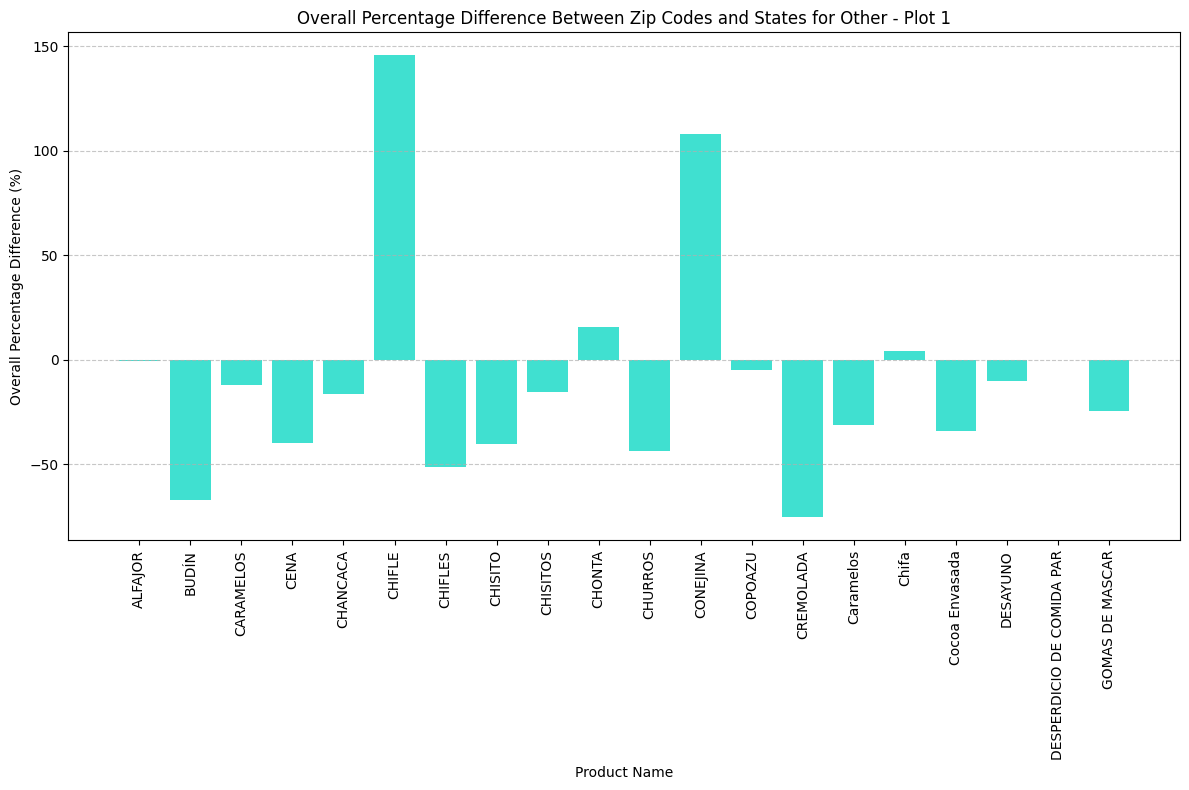

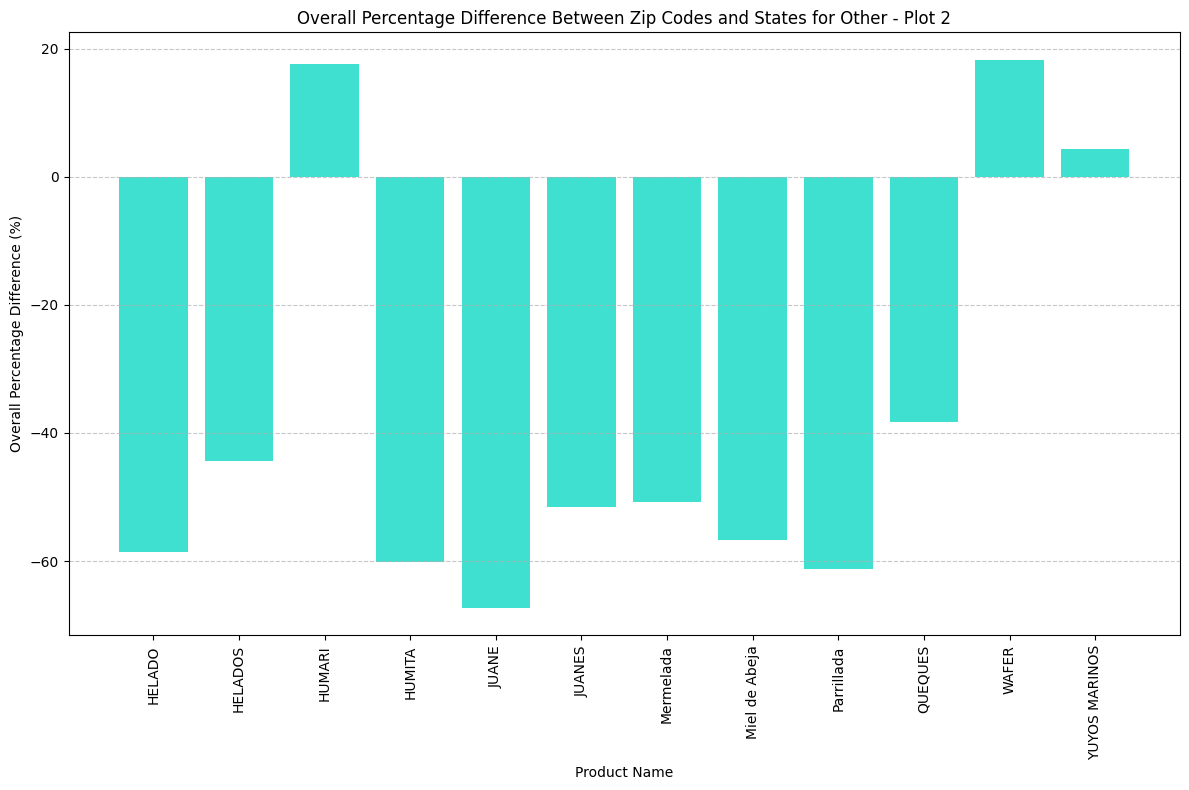

Overall percentage difference for ALFAJOR: -0.63%
Overall percentage difference for BUDÍN: -67.10%
Overall percentage difference for CARAMELOS: -12.07%
Overall percentage difference for CENA: -39.74%
Overall percentage difference for CHANCACA: -16.55%
Overall percentage difference for CHIFLE: 145.67%
Overall percentage difference for CHIFLES: -51.46%
Overall percentage difference for CHISITO: -40.00%
Overall percentage difference for CHISITOS: -15.50%
Overall percentage difference for CHONTA: 15.68%
Overall percentage difference for CHURROS: -43.54%
Overall percentage difference for CONEJINA: 108.31%
Overall percentage difference for COPOAZU: -4.76%
Overall percentage difference for CREMOLADA: -75.34%
Overall percentage difference for Caramelos: -31.09%
Overall percentage difference for Chifa: 4.16%
Overall percentage difference for Cocoa Envasada: -33.83%
Overall percentage difference for DESAYUNO: -10.00%
Overall percentage difference for DESPERDICIO DE COMIDA PAR: 0.00%
Overall perc

In [118]:
Other = category_dfs['Other']
average_prices_zipcodes = filtered_df.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
average_prices_states = Other.groupby('Product Name')['What was the total amount of the purchase?'].mean().reset_index()
merged_df = average_prices_zipcodes.merge(average_prices_states, on='Product Name', suffixes=('_Zipcodes', '_States'))
merged_df['Price Difference'] = merged_df['What was the total amount of the purchase?_States'] - merged_df['What was the total amount of the purchase?_Zipcodes']
merged_df['Percentage Difference'] = (((merged_df['What was the total amount of the purchase?_Zipcodes'] / merged_df['What was the total amount of the purchase?_States']) * 100) - 100)
overall_percentage_difference = merged_df.groupby('Product Name')['Percentage Difference'].mean().reset_index()

import matplotlib.pyplot as plt

# Function to plot the percentage difference
def plot_percentage_difference(df, title, fig_index):
    plt.figure(figsize=(12, 8))
    plt.bar(df['Product Name'], df['Percentage Difference'], color='turquoise')
    plt.xlabel('Product Name')
    plt.ylabel('Overall Percentage Difference (%)')
    plt.title(f'{title} - Plot {fig_index}')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Determine the number of plots needed
num_products = overall_percentage_difference.shape[0]
plots_needed = num_products // 20 + (num_products % 20 > 0)

# Generate each plot
for i in range(plots_needed):
    start_index = i * 20
    end_index = start_index + 20
    subset_df = overall_percentage_difference.iloc[start_index:end_index]
    plot_percentage_difference(subset_df, 'Overall Percentage Difference Between Zip Codes and States for Other', i + 1)

# Print the percentage differences for each product
for index, row in overall_percentage_difference.iterrows():
    product_name = row['Product Name']
    percentage_difference = row['Percentage Difference']
    print(f"Overall percentage difference for {product_name}: {percentage_difference:.2f}%")